# Imports & Helpers
This section contains the imports for libraries and data as well as helper methods used to create the visualizations below.

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import altair as alt
import matplotlib.pyplot as plt
from IPython import display
import seaborn as sns

In [2]:
def plot_active_users(courses, names, colors=["lightcoral", "firebrick", "lightsalmon", "coral", 'tan', 'peru', 'cornflowerblue', 'royalblue', "slateblue", 'darkslateblue', "orchid", 'darkmagenta', "pink", "palevioletred"]):    
    plt.figure(figsize=(20,5))
    plt.title("Active Users", fontsize=18, pad=20)
    plt.xlabel('Date')
    plt.ylabel('# of Active Users', fontsize=14)

    for i in range(len(courses)):
        plt.plot(courses[i]['Time'], courses[i]['Active Users'], color=colors[i], label=str(names[i]))

    plt.legend()
    plt.show()

In [3]:
def plot_active_users_annotations(course, name, annotations, color="dimgray"):    
    plt.figure(figsize=(20,5))
    plt.title("Active Users", fontsize=18, pad=20)
    plt.xlabel('Date', fontsize=14)
    plt.ylabel('# of Active Users', fontsize=14)
    plt.plot(course['Time'], course['Active Users'], color=color, label=str(name))
    plt.plot(annotations['x'], annotations['y'], 'o', color="black")
    
    for i in range(len(annotations['y'])):
        plt.text(annotations['x'][i], annotations['y'][i] + annotations['offset'][i], annotations['label'][i], color ="black", fontsize=14)
        plt.text(annotations['x'][i], annotations['y'][i] + 2 * annotations['offset'][i], annotations['x'][i].date(), color ="black", fontsize=12)

    plt.legend()
    plt.show()

In [4]:
def plot_active_users_single(course, name, color="cornflowerblue"):    
    plt.figure(figsize=(20,5))
    plt.title("Active Users", fontsize=18, pad=20)
    plt.xlabel('Date', fontsize=14)
    plt.ylabel('# of Active Users', fontsize=14)
    plt.plot(course['Time'], course['Active Users'], color=color, label=str(name))

    plt.legend()
    plt.show()

In [5]:
def plot_cpu(courses, names, colors=["lightcoral", "firebrick", "lightsalmon", "coral", 'tan', 'peru', 'cornflowerblue', 'royalblue', "slateblue", 'darkslateblue', "orchid", 'darkmagenta', "pink", "palevioletred"]):        
    plt.figure(figsize=(20,5))
    plt.title("CPU Usage", fontsize=18, pad=20)
    plt.xlabel('Date', fontsize=14)
    plt.ylabel("CPU Usage", fontsize=14)

    for i in range(len(courses)):
        plt.plot(courses[i]['Time'], courses[i]['Value'], color=colors[i], label=str(names[i]))

    plt.legend()
    plt.show()

In [6]:
def plot_cpu_single(course, name, color="dimgray"):
    plt.figure(figsize=(20,5))
    plt.title("CPU Usage", fontsize=18, pad=20)
    plt.xlabel('Date', fontsize=14)
    plt.ylabel("CPU Usage", fontsize=14)
    plt.plot(course['Time'], course['Value'], color=color, label=str(name))

    plt.legend()
    plt.show()

In [7]:
def plot_cpu_annotations(course, name, annotations, color="dimgray"):      
    plt.figure(figsize=(20,5))
    plt.title("CPU", fontsize=18, pad=20)
    plt.xlabel('Date', fontsize=14)
    plt.ylabel("CPU", fontsize=14)
    plt.plot(course['Time'], course['Value'], color=color, label=str(name))
    plt.plot(annotations['x'], annotations['y'], 'o', color="black")
    
    for i in range(len(annotations['y'])):
        plt.text(annotations['x'][i], annotations['y'][i] + annotations['offset'][i], annotations['label'][i], color ="black", fontsize=14)
        plt.text(annotations['x'][i], annotations['y'][i] + 2 * annotations['offset'][i], annotations['x'][i].date(), color ="black", fontsize=12)

    plt.legend()
    plt.show()

In [8]:
def plot_memory_annotations(course, name, annotations, color="dimgray"):      
    plt.figure(figsize=(20,5))
    plt.title("Memory Usage (GiB) for " + str(name), fontsize=18, pad=20)
    plt.xlabel('Date', fontsize=14)
    plt.ylabel("Memory Usage (GiB)", fontsize=14)
    plt.plot(course['Time'], course['Value'] * 1.0 / (2 ** 30), color=color, label=str(name))
    plt.plot(annotations['x'], annotations['y'], 'o', color="black")
    
    for i in range(len(annotations['y'])):
        plt.text(annotations['x'][i], annotations['y'][i] + annotations['offset'][i], annotations['label'][i], color ="black", fontsize=14)
        plt.text(annotations['x'][i], annotations['y'][i] + 2 * annotations['offset'][i], annotations['x'][i].date(), color ="black", fontsize=12)

    plt.legend()
    plt.show()

In [9]:
def plot_memory(courses, names, colors=["lightcoral", "firebrick", "lightsalmon", "coral", 'tan', 'peru', 'cornflowerblue', 'royalblue', "slateblue", 'darkslateblue', "orchid", 'darkmagenta', "pink", "palevioletred"]):        
    plt.figure(figsize=(20,5))
    plt.title("Memory Usage (GiB) for " + str(names[0]) + " and "+ str(names[1]), fontsize=18, pad=20)
    plt.xlabel('Date', fontsize=14)
    plt.ylabel("Memory Usage (GiB)", fontsize=14)

    for i in range(len(courses)):
        plt.plot(courses[i]['Time'], courses[i]['Value'] * 1.0 / (2 ** 30), color=colors[i], label=str(names[i]))

    plt.legend()
    plt.show()

In [10]:
def plot_memory_single(course, name, color="dimgray"):
    plt.figure(figsize=(20,5))
    plt.title("Memory Usage (GiB) for " + str(name), fontsize=18, pad=20)
    plt.xlabel('Date', fontsize=14)
    plt.ylabel("Memory (GiB)", fontsize=14)
    plt.plot(course['Time'], course['Value'], color=color, label=str(name))

    plt.legend()
    plt.show()

In [11]:
def split_fasp(dataset):
    dataset['Time'] = pd.to_datetime(dataset['Time'])
    return [dataset[dataset['Time'] < datetime(2020, 12, 31)], dataset[dataset['Time'] > datetime(2020, 12, 31)]]

In [12]:
def return_active_users(dataset, date):
    return dataset[dataset['Time'] == date]['Active Users']

In [13]:
def return_value(dataset, date):
    return dataset[dataset['Time'] == date]['Value']

# Users
This section visualizes the number of unique users at each timestamp given in the Grafana data for each of the hubs. It separates the data between fall and spring semesters.

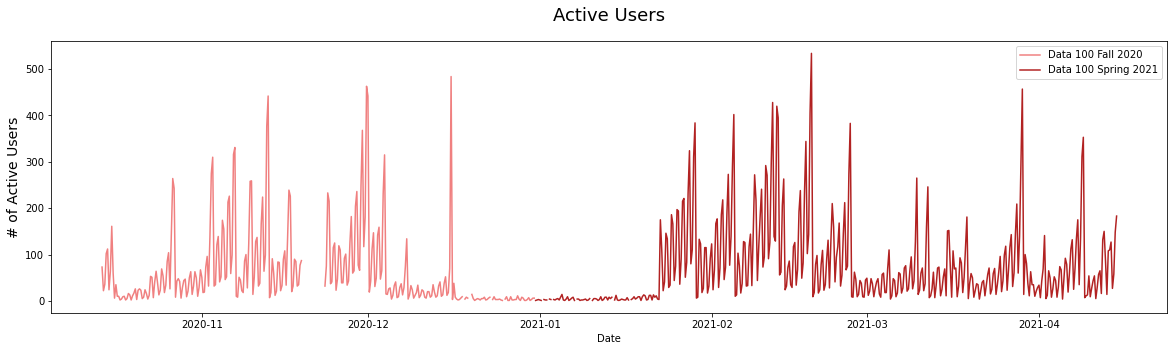

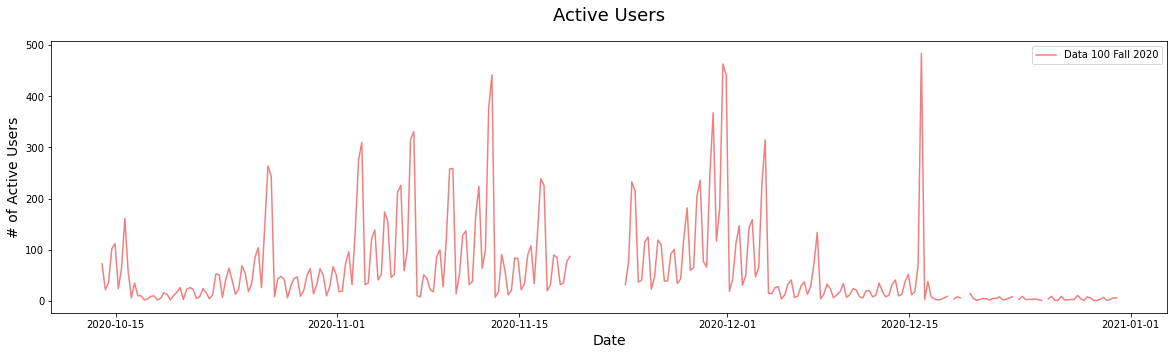

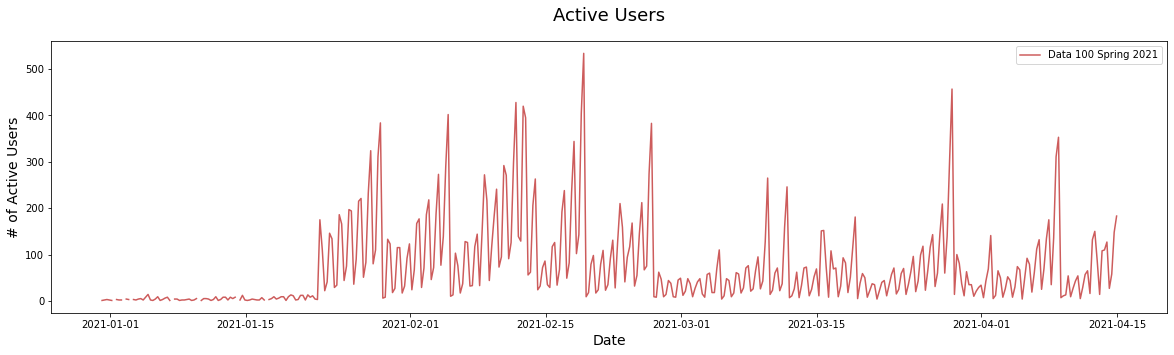

In [14]:
data100_path = '../data/grafana/data100hub/'
data100_users = pd.read_csv(data100_path + "data100_users.csv")

data100_fall_users, data100_spring_users = split_fasp(data100_users)

plot_active_users([data100_fall_users, data100_spring_users], ["Data 100 Fall 2020", "Data 100 Spring 2021"])
plot_active_users_single(data100_fall_users, "Data 100 Fall 2020", "lightcoral")
plot_active_users_single(data100_spring_users, "Data 100 Spring 2021", "indianred")

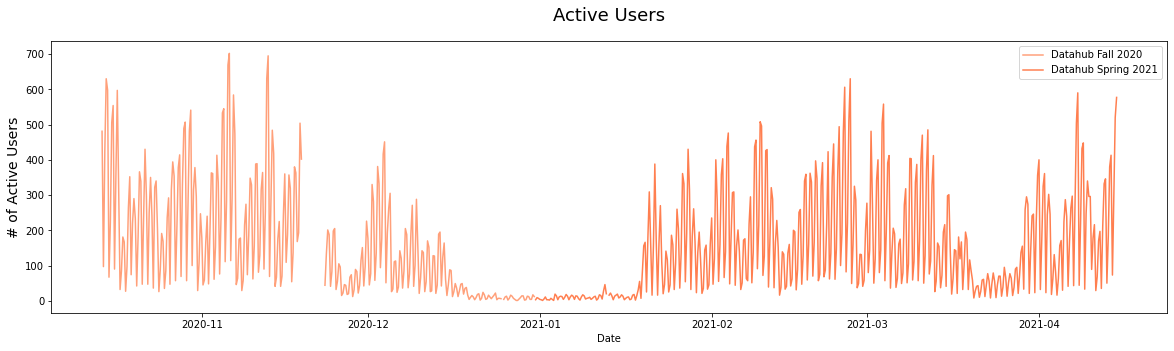

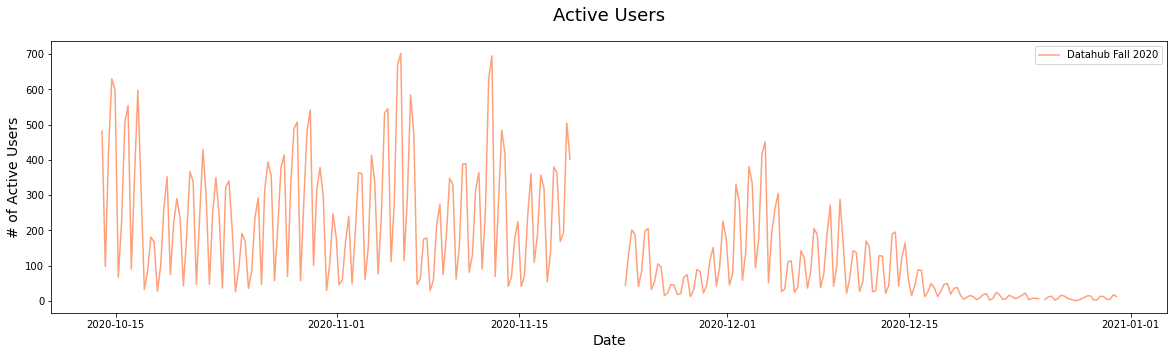

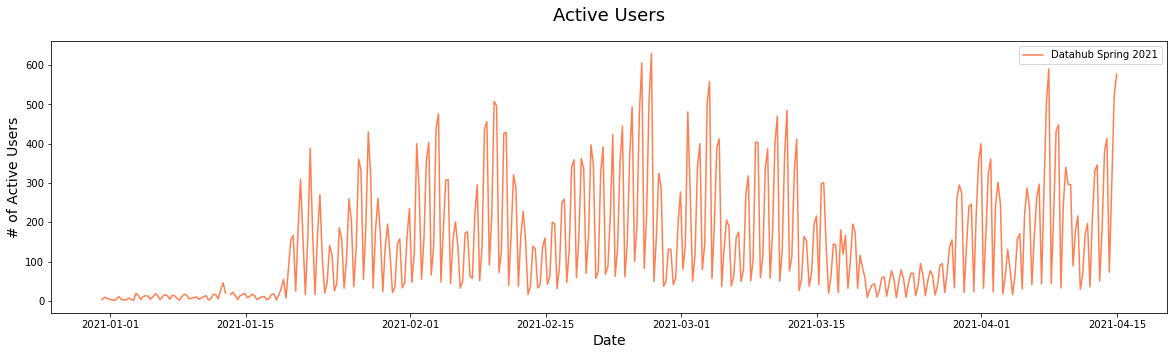

In [15]:
datahub_path = '../data/grafana/datahub/'
datahub_users = pd.read_csv(datahub_path + "datahub_users.csv")

datahub_fall_users, datahub_spring_users = split_fasp(datahub_users)

plot_active_users([datahub_fall_users, datahub_spring_users], ["Datahub Fall 2020", "Datahub Spring 2021"], ["lightsalmon", "coral"])
plot_active_users_single(datahub_fall_users, "Datahub Fall 2020", "lightsalmon")
plot_active_users_single(datahub_spring_users, "Datahub Spring 2021", "coral")

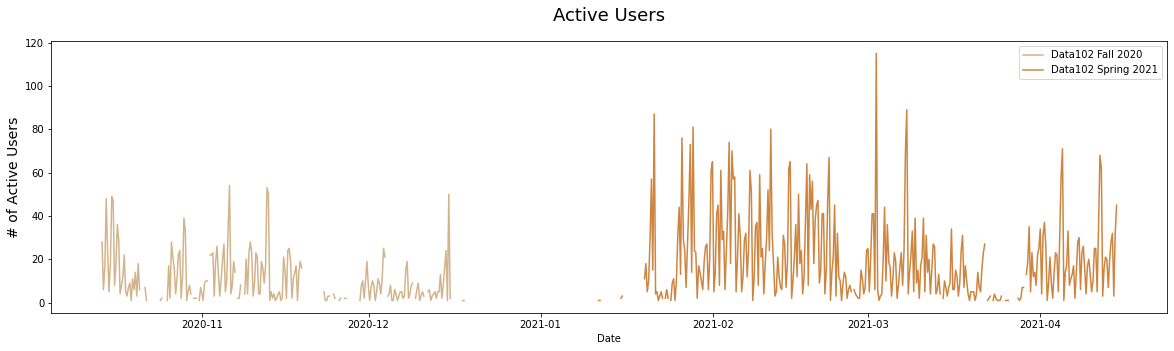

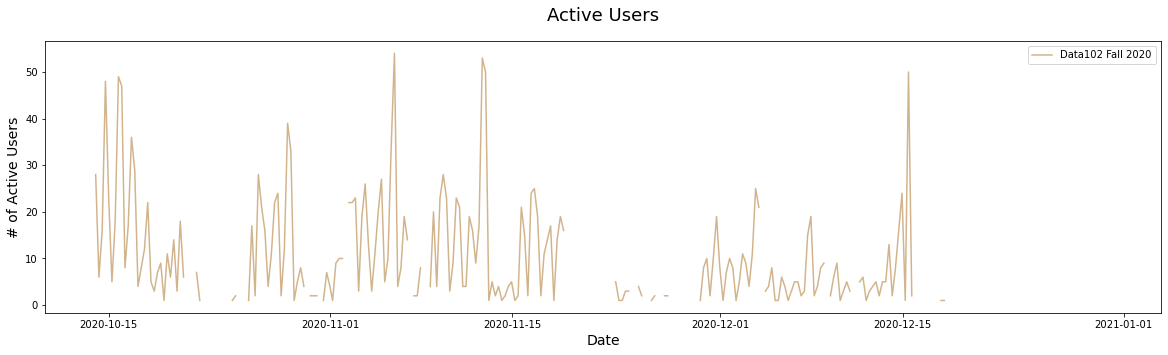

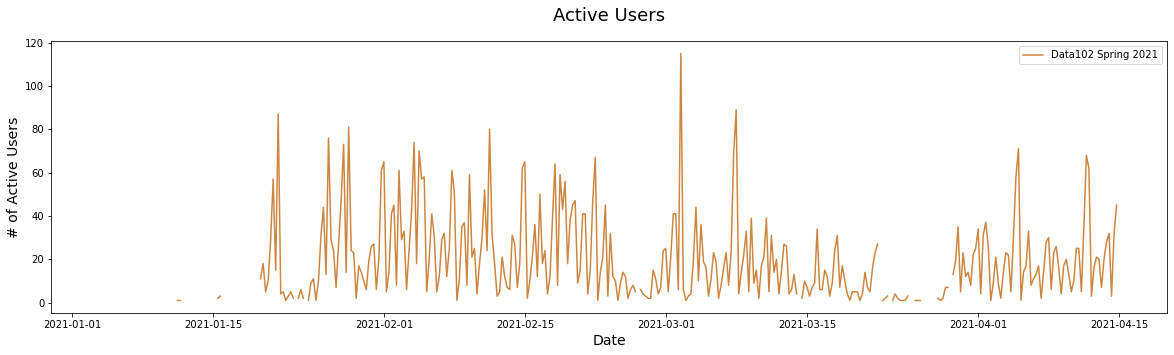

In [16]:
data102_path = '../data/grafana/data102hub/'
data102_users = pd.read_csv(data102_path + "data102_users.csv")

data102_fall_users, data102_spring_users = split_fasp(data102_users)
names = ["Data102 Fall 2020", "Data102 Spring 2021"]

plot_active_users([data102_fall_users, data102_spring_users], ["Data102 Fall 2020", "Data102 Spring 2021"], ['tan', 'peru'])
plot_active_users_single(data102_fall_users, "Data102 Fall 2020", 'tan')
plot_active_users_single(data102_spring_users, "Data102 Spring 2021", 'peru')

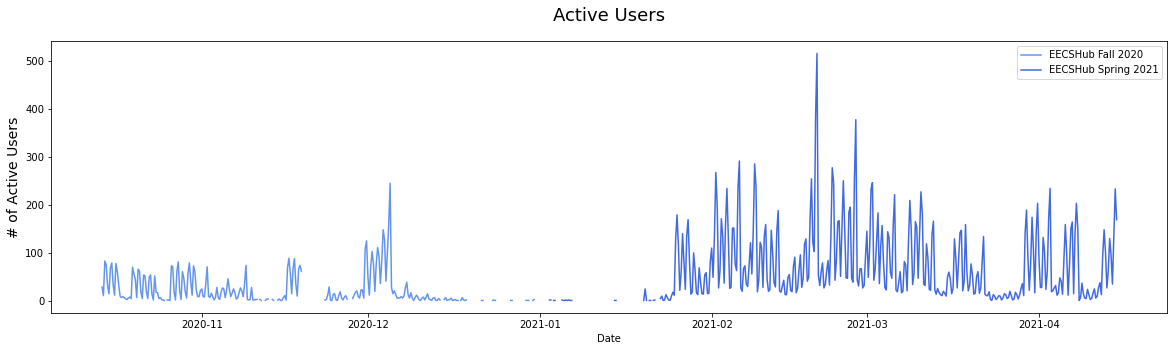

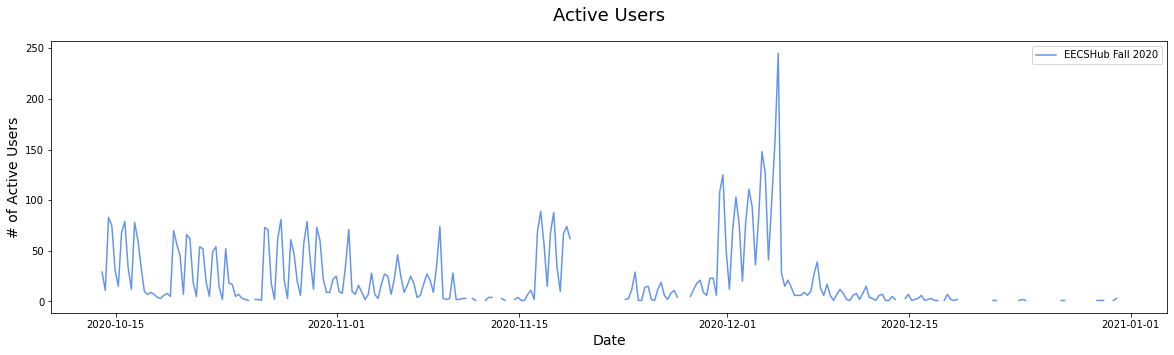

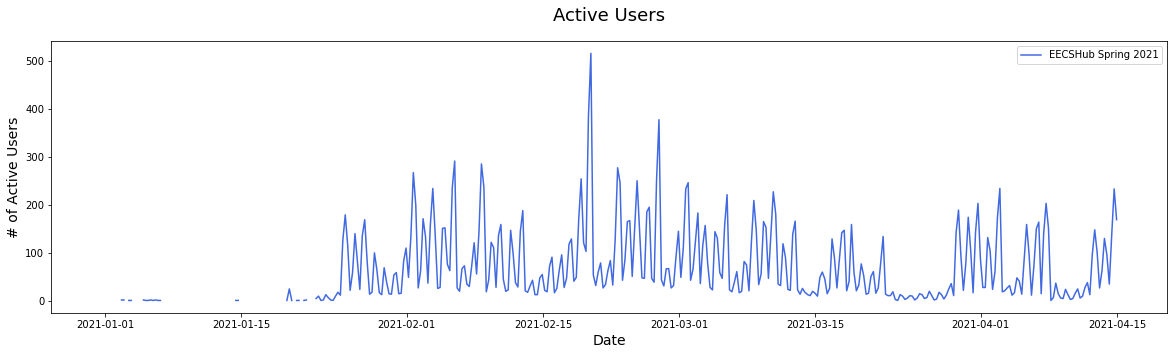

In [17]:
eecs_path = '../data/grafana/eecshub/'
eecs_users = pd.read_csv(eecs_path + "eecs_users.csv")

eecs_fall_users, eecs_spring_users = split_fasp(eecs_users)

plot_active_users([eecs_fall_users, eecs_spring_users], ["EECSHub Fall 2020", "EECSHub Spring 2021"], ['cornflowerblue', 'royalblue'])
plot_active_users_single(eecs_fall_users, "EECSHub Fall 2020", 'cornflowerblue')
plot_active_users_single(eecs_spring_users, "EECSHub Spring 2021", 'royalblue')

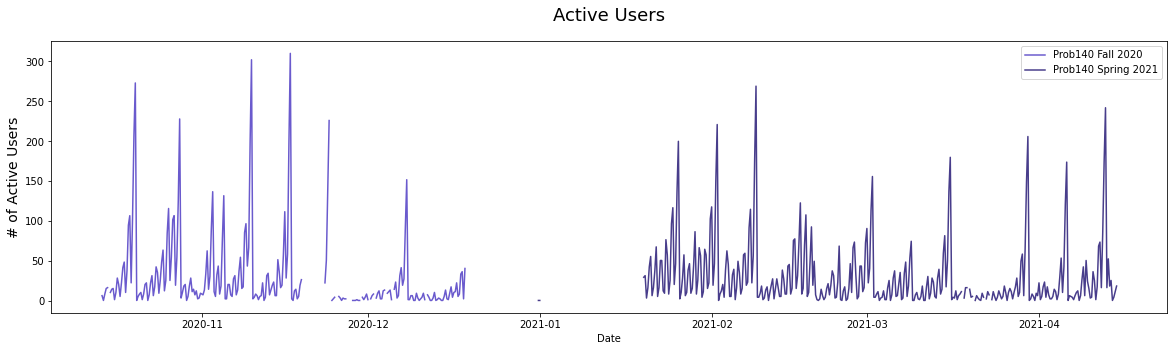

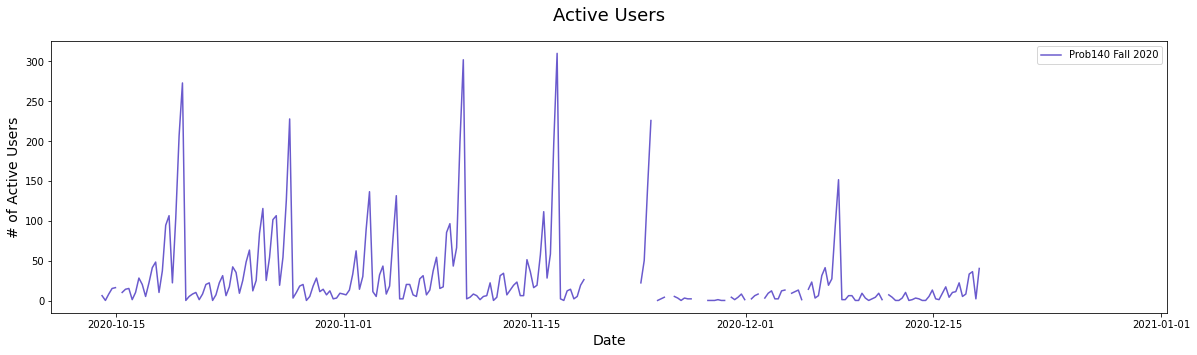

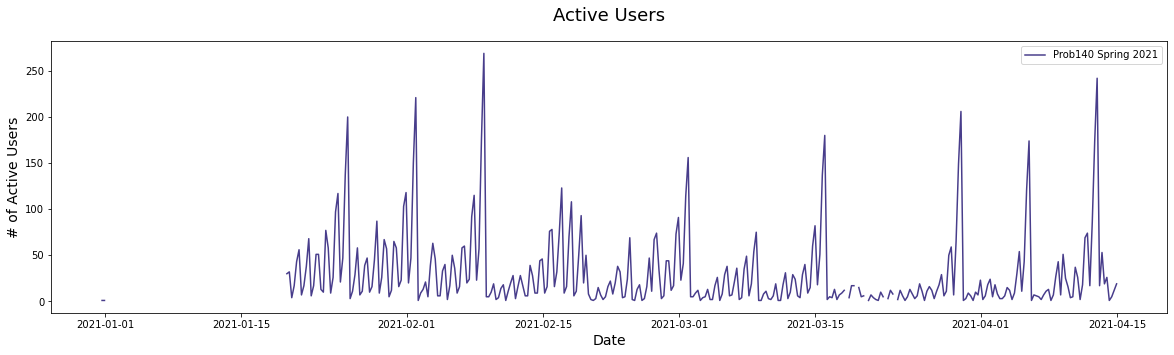

In [18]:
prob140_path = '../data/grafana/prob140hub/'
prob140_users = pd.read_csv(prob140_path + "prob140_users.csv")

prob140_fall_users, prob140_spring_users = split_fasp(prob140_users)

plot_active_users([prob140_fall_users, prob140_spring_users], ["Prob140 Fall 2020", "Prob140 Spring 2021"], ["slateblue", 'darkslateblue'])
plot_active_users_single(prob140_fall_users, "Prob140 Fall 2020", "slateblue")
plot_active_users_single(prob140_spring_users, "Prob140 Spring 2021", "darkslateblue")

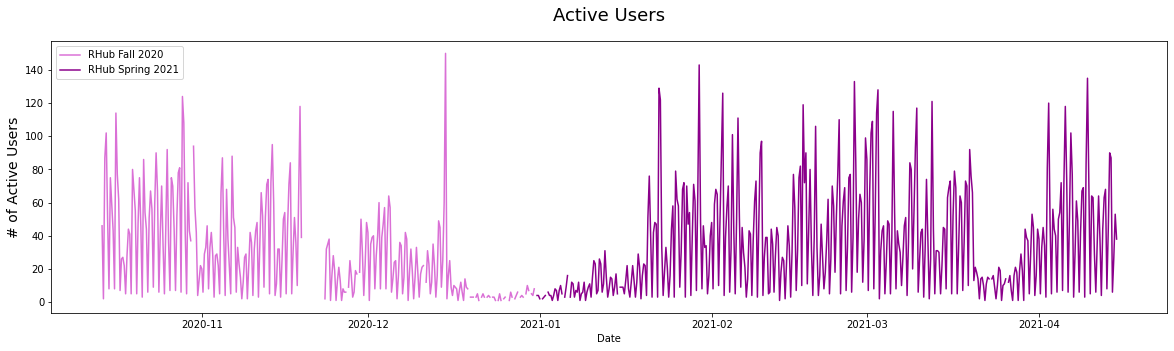

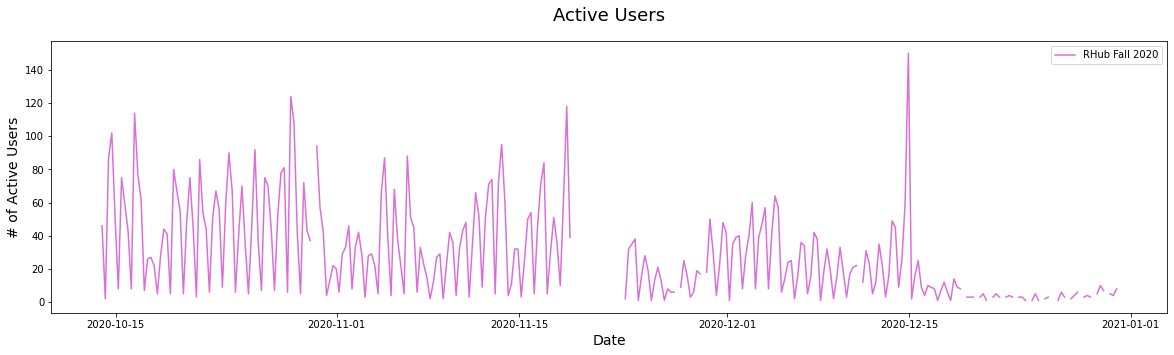

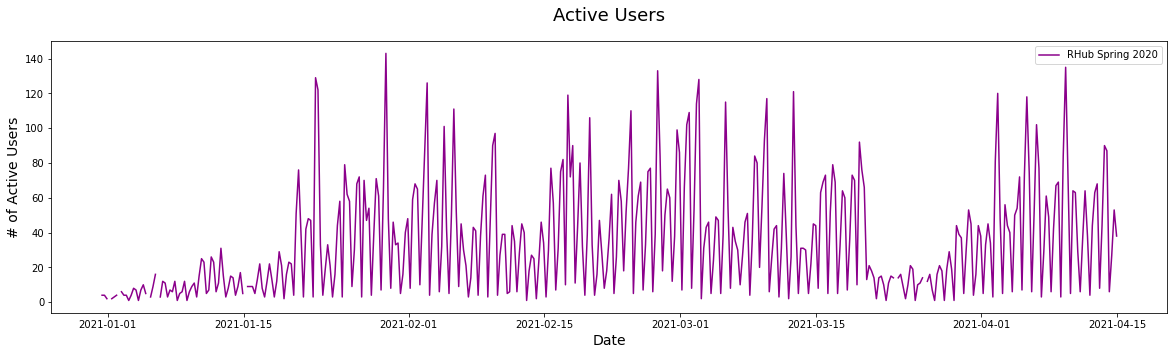

In [19]:
rhub_path = '../data/grafana/rhub/'
rhub_users = pd.read_csv(rhub_path + "rhub_users.csv")

rhub_fall_users, rhub_spring_users = split_fasp(rhub_users)

plot_active_users([rhub_fall_users, rhub_spring_users], ["RHub Fall 2020", "RHub Spring 2021"], ["orchid", 'darkmagenta'])
plot_active_users_single(rhub_fall_users, "RHub Fall 2020", "orchid")
plot_active_users_single(rhub_spring_users, "RHub Spring 2020", "darkmagenta")

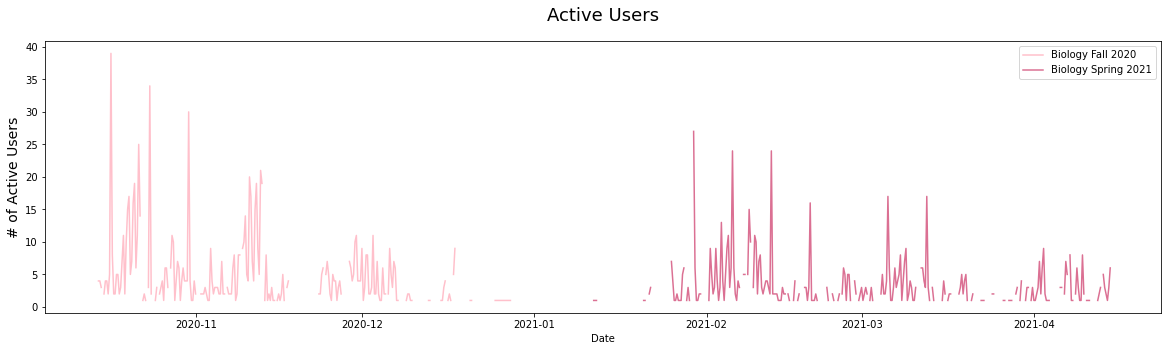

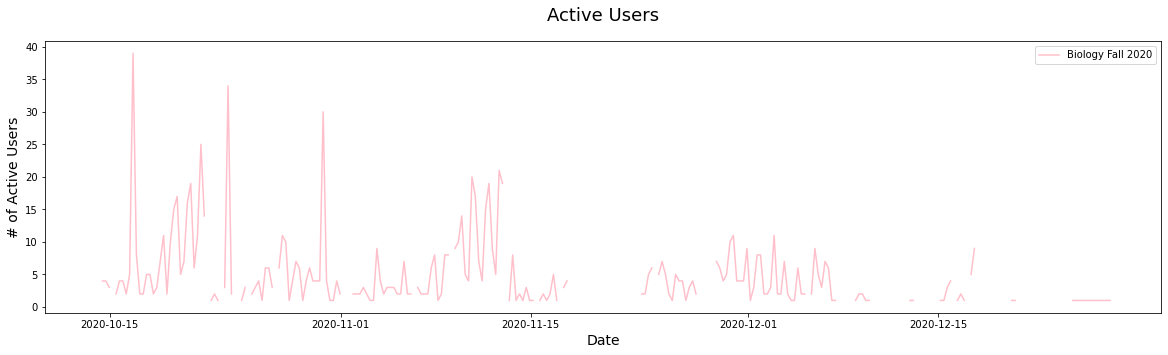

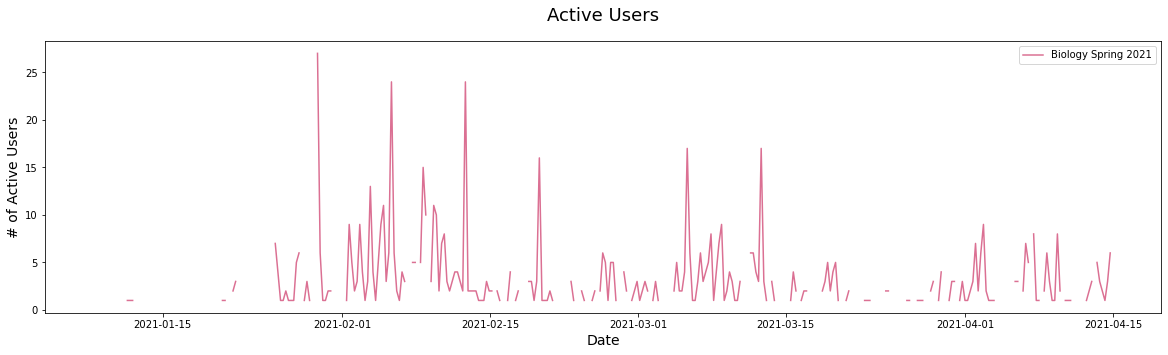

In [20]:
biology_path = '../data/grafana/biology/'
biology_users = pd.read_csv(biology_path + "biology_users.csv")

biology_fall_users, biology_spring_users = split_fasp(biology_users)

plot_active_users([biology_fall_users, biology_spring_users], ["Biology Fall 2020", "Biology Spring 2021"], ["pink", "palevioletred"])
plot_active_users_single(biology_fall_users, "Biology Fall 2020", "pink")
plot_active_users_single(biology_spring_users, "Biology Spring 2021", "palevioletred")

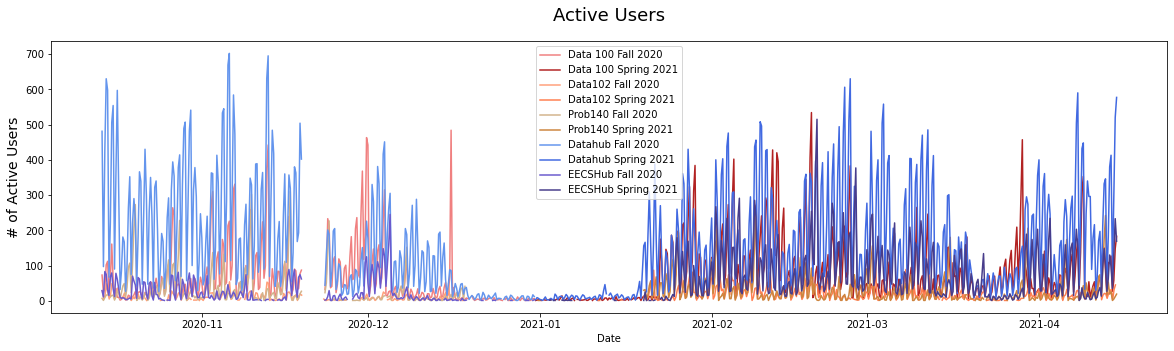

In [21]:
# Please note that we're not plotting RHub or Biology Hub on this graph since their values are so small that they don't show up
courses = data100_fall_users, data100_spring_users, data102_fall_users, data102_spring_users, prob140_fall_users, prob140_spring_users, datahub_fall_users, datahub_spring_users, eecs_fall_users, eecs_spring_users # split_fasp(rhub_cpu), split_fasp(biology_cpu)
names = ["Data 100 Fall 2020", "Data 100 Spring 2021", "Data102 Fall 2020", "Data102 Spring 2021", "Prob140 Fall 2020", "Prob140 Spring 2021", "Datahub Fall 2020", "Datahub Spring 2021", "EECSHub Fall 2020", "EECSHub Spring 2021", "RHub Fall 2020", "RHub Spring 2021", "Biology Fall 2020", "Biology Spring 2021"]

plot_active_users(courses, names)

In [22]:
colors=["lightcoral", "firebrick", "lightsalmon", "coral", 'tan', 'peru', 'cornflowerblue', 'royalblue', "slateblue", 'darkslateblue', "orchid", 'darkmagenta', "pink", "palevioletred"]

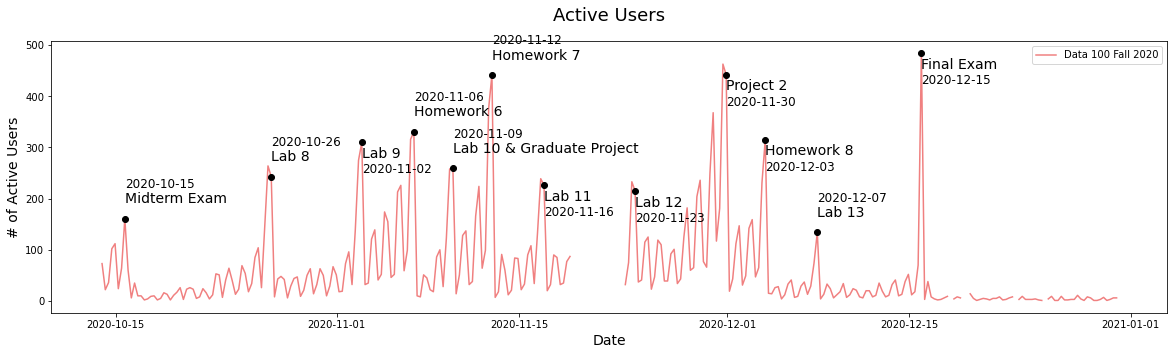

In [23]:
data100_dates = [ 
    datetime(2020, 10, 15, 17, 0, 0), datetime(2020, 10, 26, 23, 0, 0), datetime(2020, 11, 2, 22, 0, 0), 
    datetime(2020, 11, 6, 22, 0, 0), datetime(2020, 11, 9, 22, 0, 0), datetime(2020, 11, 12, 22, 0, 0), 
    datetime(2020, 11, 16, 22, 0, 0), datetime(2020, 11, 23, 22, 0, 0), datetime(2020, 11, 30, 22, 0, 0), 
    datetime(2020, 12, 3, 22, 0, 0), datetime(2020, 12, 7, 22, 0, 0), datetime(2020, 12, 15, 22, 0, 0)
]

data100_fall_labels = ['Midterm Exam', 'Lab 8', 'Lab 9', 'Homework 6', 'Lab 10 & Graduate Project', 'Homework 7', 
              'Lab 11', 'Lab 12', 'Project 2', 'Homework 8', 'Lab 13', 'Final Exam']

data100_annotations = pd.DataFrame({
    'x': data100_dates,
    'y': [return_active_users(data100_users, date) for date in data100_dates],
    'label': data100_fall_labels,
    'offset': [30, 30, -30, 30, 30, 30, -30, -30, -30, -30, 30, -30]
})

plot_active_users_annotations(data100_fall_users, "Data 100 Fall 2020", data100_annotations, colors[0])

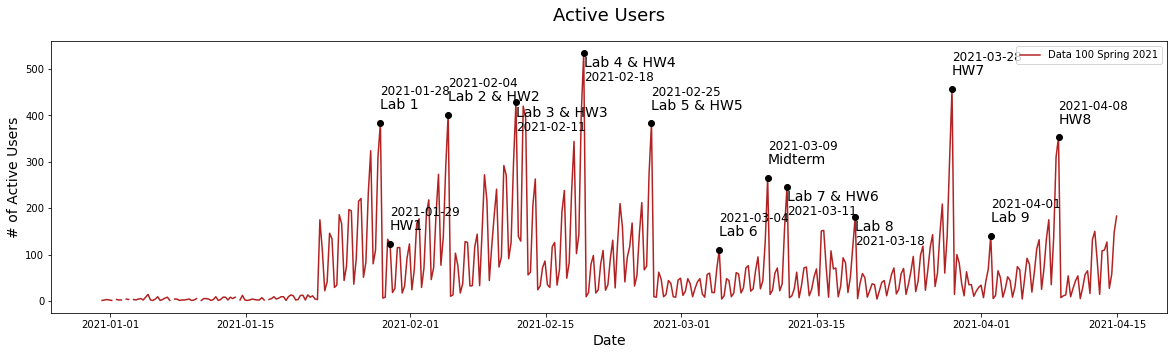

In [24]:
data100_spring_dates = [ 
    datetime(2021, 1, 28, 22, 0, 0), datetime(2021, 1, 29, 22, 0, 0), datetime(2021, 2, 4, 22, 0, 0),
    datetime(2021, 2, 11, 22, 0, 0), datetime(2021, 2, 18, 22, 0, 0), datetime(2021, 2, 25, 22, 0, 0),
    datetime(2021, 3, 4, 22, 0, 0), datetime(2021, 3, 9, 22, 0, 0), datetime(2021, 3, 11, 22, 0, 0), 
    datetime(2021, 3, 18, 23, 0, 0), datetime(2021, 3, 28, 23, 0, 0), datetime(2021, 4, 1, 23, 0, 0), 
    datetime(2021, 4, 8, 23, 0, 0)
]

data100_spring_labels = ['Lab 1', 'HW1', 'Lab 2 & HW2', 'Lab 3 & HW3', 
                         'Lab 4 & HW4', 'Lab 5 & HW5', 'Lab 6', 'Midterm', 
                         'Lab 7 & HW6', 'Lab 8', 'HW7', 'Lab 9', 'HW8']
data100_spring_offsets = [30, 30, 30, -30, -30, 30, 30, 30, -30, -30, 30, 30, 30]

data100_spring_annotations = pd.DataFrame({
    'x': data100_spring_dates,
    'y': [return_active_users(data100_users, date) for date in data100_spring_dates],
    'label': data100_spring_labels,
    'offset': data100_spring_offsets,
})

plot_active_users_annotations(data100_spring_users, "Data 100 Spring 2021", data100_spring_annotations, colors[1])

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


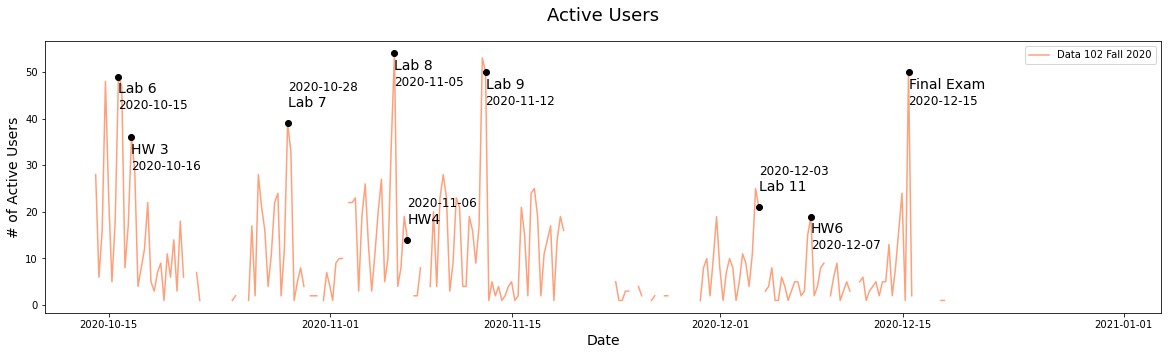

In [25]:
offset = 3.5
data102_fall = [ 
    datetime(2020, 10, 15, 18, 0, 0), datetime(2020, 10, 16, 18, 0, 0), datetime(2020, 10, 28, 18, 0, 0), 
    datetime(2020, 11, 5, 23, 0, 0), datetime(2020, 11, 6, 23, 0, 0),
    datetime(2020, 11, 12, 23, 0, 0), datetime(2020, 11, 19, 23, 0, 0), datetime(2020, 11, 20, 23, 0, 0),
    datetime(2020, 12, 3, 23, 0, 0), datetime(2020, 12, 7, 23, 0, 0), datetime(2020, 12, 15, 11, 0, 0)
]

data102_fall_labels = ['Lab 6', 'HW 3', 'Lab 7', 'Lab 8', 'HW4', 'Lab 9', 'Lab 10', 'HW5', 'Lab 11', 
                       'HW6', 'Final Exam']
data102_fall_offsets = [-offset, -offset, offset, -offset, offset, -offset, -offset, offset, offset, 
                        -offset, -offset]

data102_fall_annotations = pd.DataFrame({
    'x': data102_fall,
    'y': [return_active_users(data102_users, date) for date in data102_fall],
    'label': data102_fall_labels,
    'offset': data102_fall_offsets
})

plot_active_users_annotations(data102_fall_users, "Data 102 Fall 2020", data102_fall_annotations, colors[2])

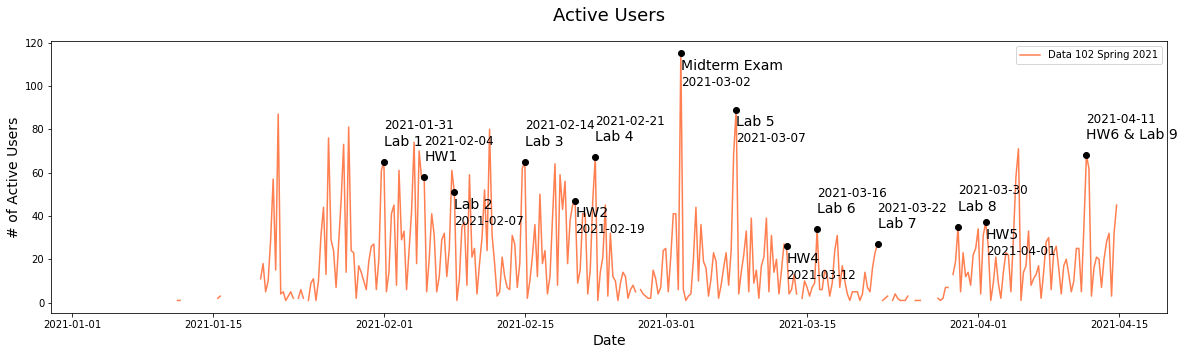

In [26]:
offset = 7.5
data102_spring = [ 
    datetime(2021, 1, 31, 23, 0, 0), datetime(2021, 2, 4, 23, 0, 0), datetime(2021, 2, 7, 23, 0, 0), 
    datetime(2021, 2, 14, 23, 0, 0), datetime(2021, 2, 19, 23, 0, 0), 
    datetime(2021, 2, 21, 23, 0, 0), datetime(2021, 3, 2, 11, 0, 0), datetime(2021, 3, 7, 23, 0, 0),
    datetime(2021, 3, 12, 23, 0, 0), datetime(2021, 3, 16, 0, 0, 0), datetime(2021, 3, 22, 0, 0, 0), 
    datetime(2021, 3, 30, 0, 0, 0), datetime(2021, 4, 1, 18, 0, 0), datetime(2021, 4, 11, 18, 0, 0)
]

data102_spring_labels = ['Lab 1', 'HW1', 'Lab 2', 'Lab 3', 'HW2', 'Lab 4', 'Midterm Exam', 'Lab 5', 
                         'HW4', 'Lab 6', 'Lab 7', 'Lab 8', 'HW5', 'HW6 & Lab 9']

data102_spring_offsets = [offset, offset, -offset, offset, -offset, offset, -offset, -offset, 
                          -offset, offset, offset, offset, -offset, offset]

data102_spring_annotations = pd.DataFrame({
    'x': data102_spring,
    'y': [return_active_users(data102_users, date) for date in data102_spring],
    'label': data102_spring_labels,
    'offset': data102_spring_offsets
})

plot_active_users_annotations(data102_spring_users, "Data 102 Spring 2021", data102_spring_annotations, colors[3])

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


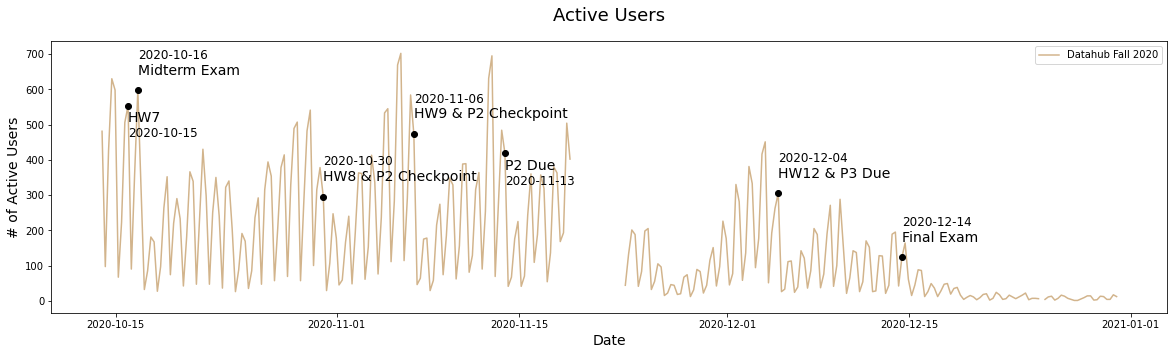

In [27]:
offset = 45
datahub_fall = [ 
    datetime(2020, 10, 15, 23, 0, 0), datetime(2020, 10, 16, 17, 0, 0), datetime(2020, 10, 30, 23, 0, 0),
    datetime(2020, 11, 6, 22, 0, 0), datetime(2020, 11, 13, 22, 0, 0), datetime(2020, 11, 21, 22, 0, 0),
    datetime(2020, 12, 4, 22, 0, 0), datetime(2020, 12, 14, 10, 0, 0)
]

datahub_fall_labels = ['HW7', 'Midterm Exam', 'HW8 & P2 Checkpoint', 'HW9 & P2 Checkpoint', 'P2 Due', 
                       'HW11', 'HW12 & P3 Due', 'Final Exam']
datahub_fall_offsets = [-offset, offset, offset, offset, -offset, offset, offset, offset]

datahub_fall_annotations = pd.DataFrame({
    'x': datahub_fall,
    'y': [return_active_users(datahub_users, date) for date in datahub_fall],
    'label': datahub_fall_labels,
    'offset': datahub_fall_offsets
})

plot_active_users_annotations(datahub_fall_users, "Datahub Fall 2020", datahub_fall_annotations, colors[4])

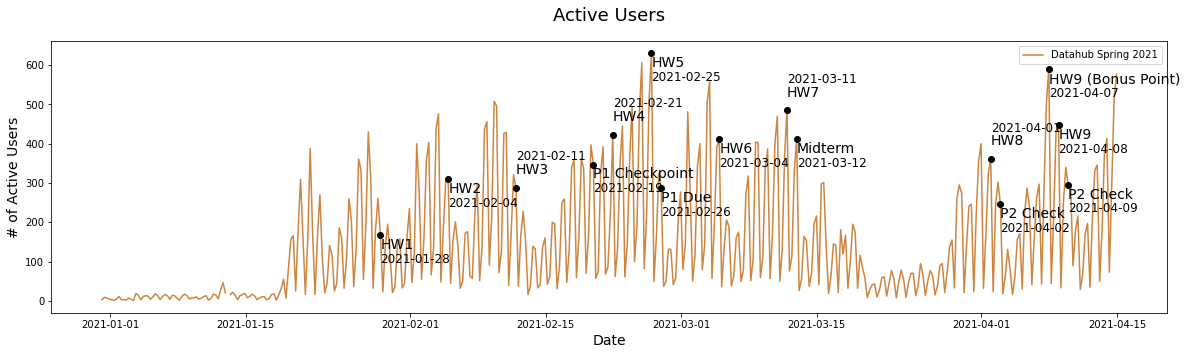

In [28]:
offset = 35
datahub_spring = [ 
    datetime(2021, 1, 28, 22, 0, 0), datetime(2021, 2, 4, 22, 0, 0), datetime(2021, 2, 11, 22, 0, 0),
    datetime(2021, 2, 19, 22, 0, 0), datetime(2021, 2, 21, 22, 0, 0), datetime(2021, 2, 25, 22, 0, 0),
    datetime(2021, 2, 26, 22, 0, 0), datetime(2021, 3, 4, 22, 0, 0), datetime(2021, 3, 11, 22, 0, 0),
    datetime(2021, 3, 12, 22, 0, 0), datetime(2021, 4, 1, 23, 0, 0), datetime(2021, 4, 2, 23, 0, 0),
    datetime(2021, 4, 7, 23, 0, 0),  datetime(2021, 4, 8, 23, 0, 0), datetime(2021, 4, 9, 23, 0, 0)
]

datahub_spring_labels = ['HW1', 'HW2', 'HW3', 'P1 Checkpoint', 'HW4', 'HW5', 'P1 Due', 'HW6', 'HW7', 
                         'Midterm', 'HW8', 'P2 Check', 'HW9 (Bonus Point)', 'HW9', 'P2 Check']
datahub_spring_offsets = [-offset, -offset, offset, -offset, offset, -offset, -offset, -offset, offset, 
                        -offset, offset, -offset, -offset, -offset, -offset]

datahub_spring_annotations = pd.DataFrame({
    'x': datahub_spring,
    'y': [return_active_users(datahub_users, date) for date in datahub_spring],
    'label': datahub_spring_labels,
    'offset': datahub_spring_offsets
})

plot_active_users_annotations(datahub_spring_users, "Datahub Spring 2021", datahub_spring_annotations, colors[5])

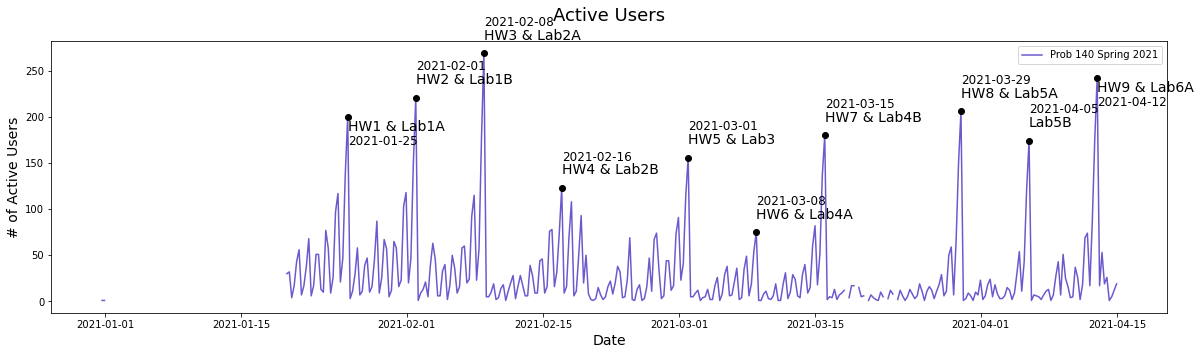

In [30]:
offset = 15
prob140_spring = [ 
    datetime(2021, 1, 25, 22, 0, 0), datetime(2021, 2, 1, 22, 0, 0), 
    datetime(2021, 2, 8, 22, 0, 0), datetime(2021, 2, 16, 22, 0, 0),
    datetime(2021, 3, 1, 22, 0, 0), datetime(2021, 3, 8, 22, 0, 0),
    datetime(2021, 3, 15, 23, 0, 0), datetime(2021, 3, 29, 23, 0, 0),
    datetime(2021, 4, 5, 23, 0, 0), datetime(2021, 4, 12, 23, 0, 0),
]

prob140_spring_labels = [
    'HW1 & Lab1A', 'HW2 & Lab1B', 'HW3 & Lab2A', 'HW4 & Lab2B', 
    'HW5 & Lab3', 'HW6 & Lab4A', 'HW7 & Lab4B', 'HW8 & Lab5A',
    'Lab5B', 'HW9 & Lab6A'
]

prob140_spring_offsets = [
    -offset, offset, offset, offset, offset, offset, offset, offset,
    offset, -offset
]

prob140_fall_annotations = pd.DataFrame({
    'x': prob140_spring,
    'y': [return_active_users(prob140_users, date) for date in prob140_spring],
    'label': prob140_spring_labels,
    'offset': prob140_spring_offsets
})

plot_active_users_annotations(prob140_spring_users, "Prob 140 Spring 2021", prob140_fall_annotations, colors[8])

# CPU
This section visualizes the CPU at each timestamp given in the Grafana data for each of the hubs. It separates the data between fall and spring semesters.

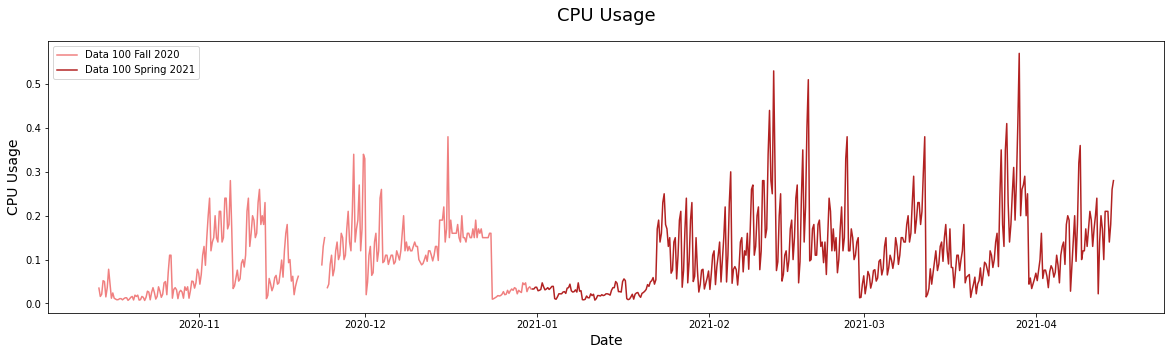

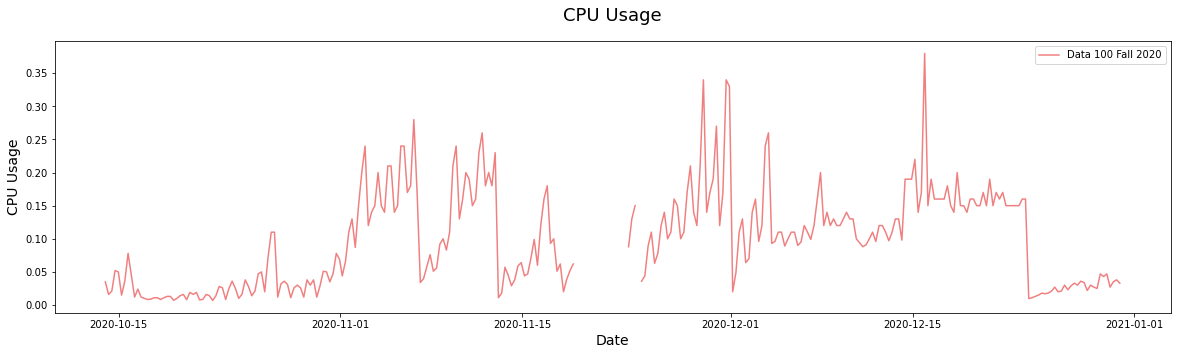

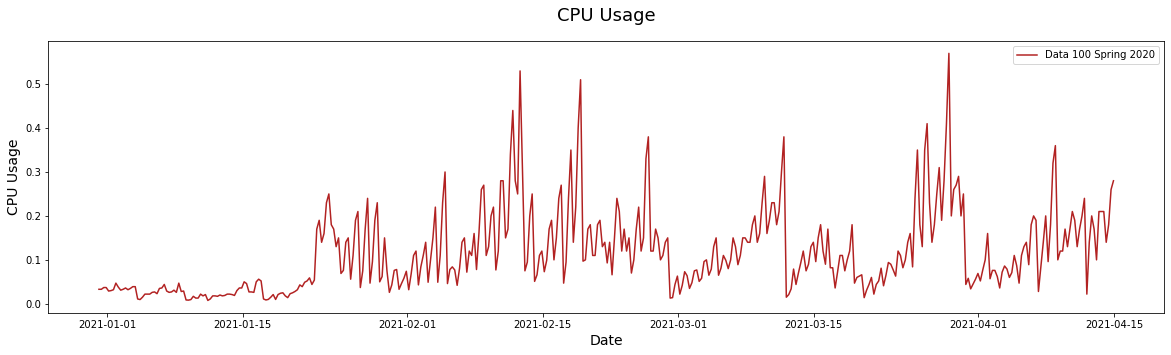

In [31]:
data100_path = '../data/grafana/data100hub/'
data100_cpu = pd.read_csv(data100_path + 'data100_cpu.csv')

data100_fall_cpu, data100_spring_cpu = split_fasp(data100_cpu)
names = ["Data 100 Fall 2020", "Data 100 Spring 2021"]

plot_cpu([data100_fall_cpu, data100_spring_cpu], ["Data 100 Fall 2020", "Data 100 Spring 2021"], [colors[0], colors[1]])
plot_cpu_single(data100_fall_cpu, "Data 100 Fall 2020", colors[0])
plot_cpu_single(data100_spring_cpu, "Data 100 Spring 2020", colors[1])

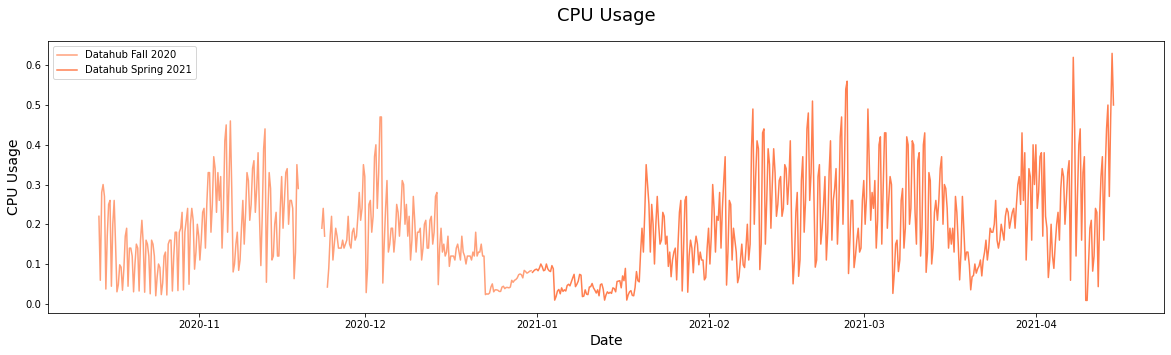

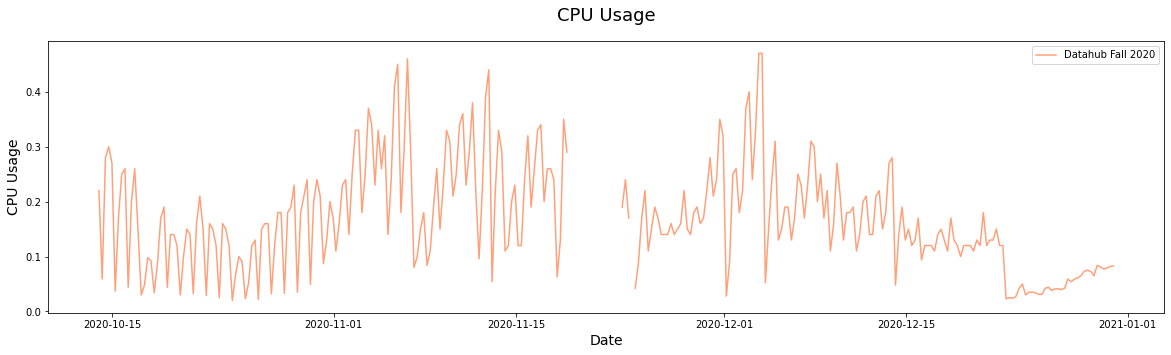

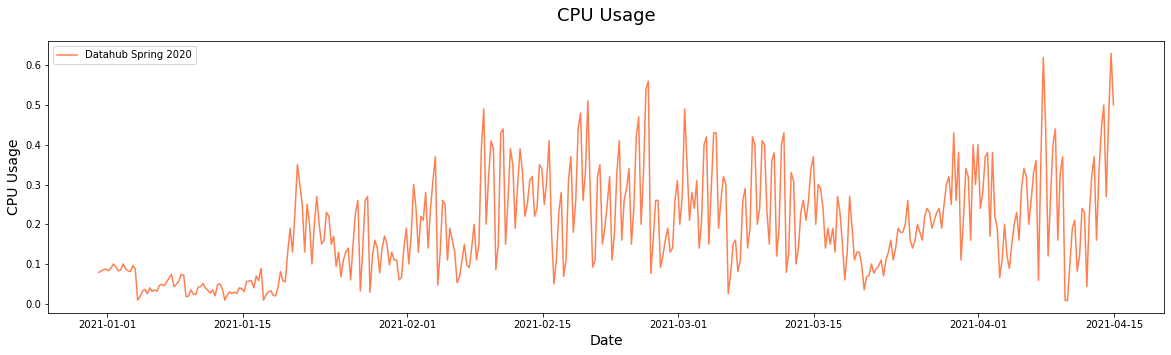

In [32]:
datahub_path = '../data/grafana/datahub/'
datahub_cpu = pd.read_csv(datahub_path + 'datahub_cpu.csv')

datahub_fall_cpu, datahub_spring_cpu = split_fasp(datahub_cpu)

plot_cpu([datahub_fall_cpu, datahub_spring_cpu], ["Datahub Fall 2020", "Datahub Spring 2021"], [colors[2], colors[3]])
plot_cpu_single(datahub_fall_cpu, "Datahub Fall 2020", colors[2])
plot_cpu_single(datahub_spring_cpu, "Datahub Spring 2020", colors[3])

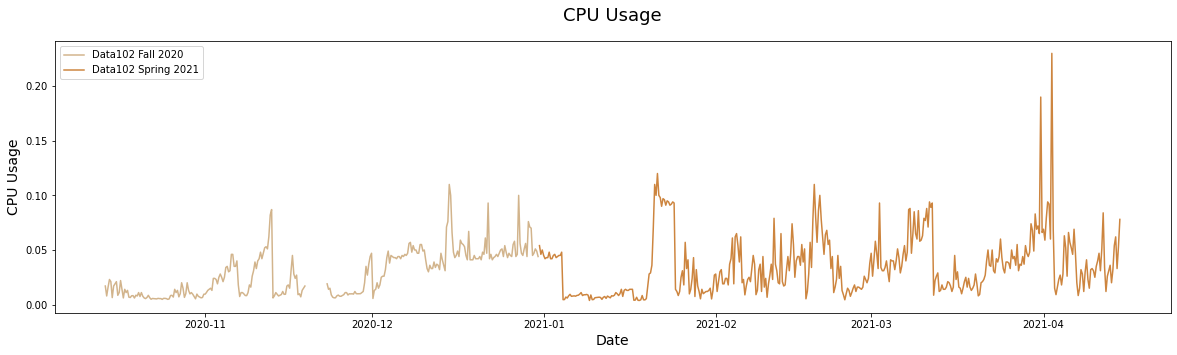

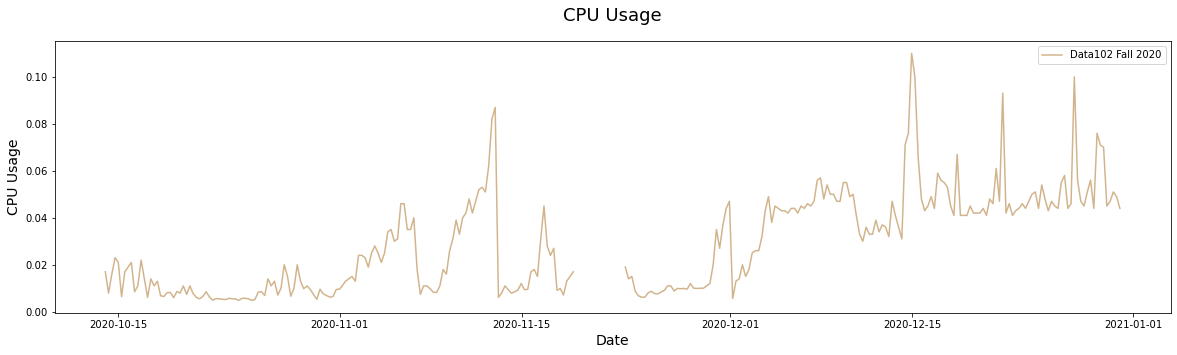

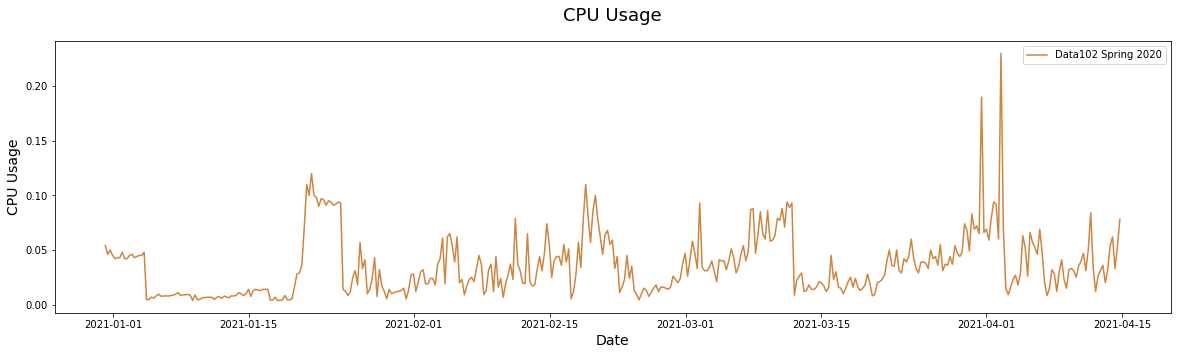

In [33]:
data102_path = '../data/grafana/data102hub/'
data102_cpu = pd.read_csv(data102_path + "data102_cpu.csv")

data102_fall_cpu, data102_spring_cpu = split_fasp(data102_cpu)
names = ["Data102 Fall 2020", "Data102 Spring 2021"]

plot_cpu([data102_fall_cpu, data102_spring_cpu], ["Data102 Fall 2020", "Data102 Spring 2021"], [colors[4], colors[5]])
plot_cpu_single(data102_fall_cpu, "Data102 Fall 2020", colors[4])
plot_cpu_single(data102_spring_cpu, "Data102 Spring 2020", colors[5])

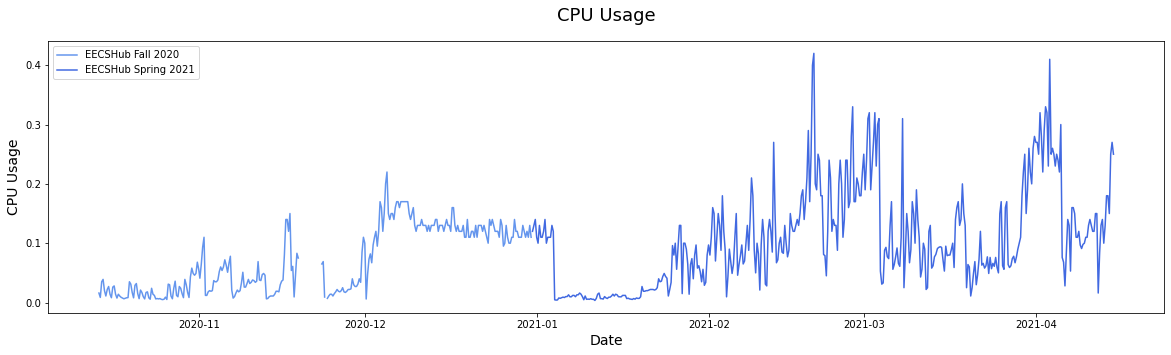

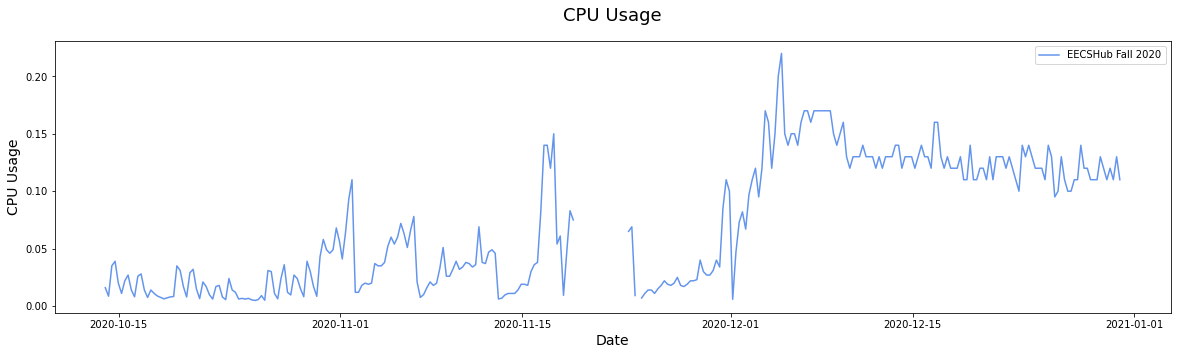

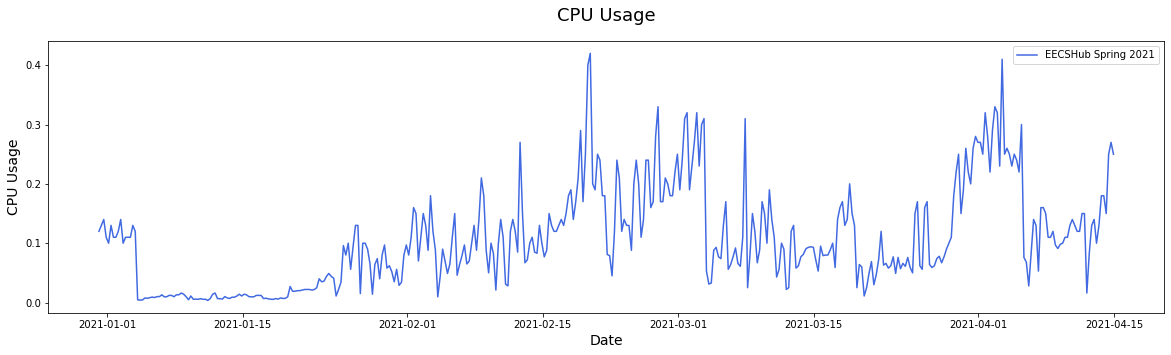

In [34]:
eecs_path = '../data/grafana/eecshub/'
eecs_cpu = pd.read_csv(eecs_path + "eecs_cpu.csv")

eecs_fall_cpu, eecs_spring_cpu = split_fasp(eecs_cpu)

plot_cpu([eecs_fall_cpu, eecs_spring_cpu], ["EECSHub Fall 2020", "EECSHub Spring 2021"], [colors[6], colors[7]])
plot_cpu_single(eecs_fall_cpu, "EECSHub Fall 2020", colors[6])
plot_cpu_single(eecs_spring_cpu, "EECSHub Spring 2021", colors[7])

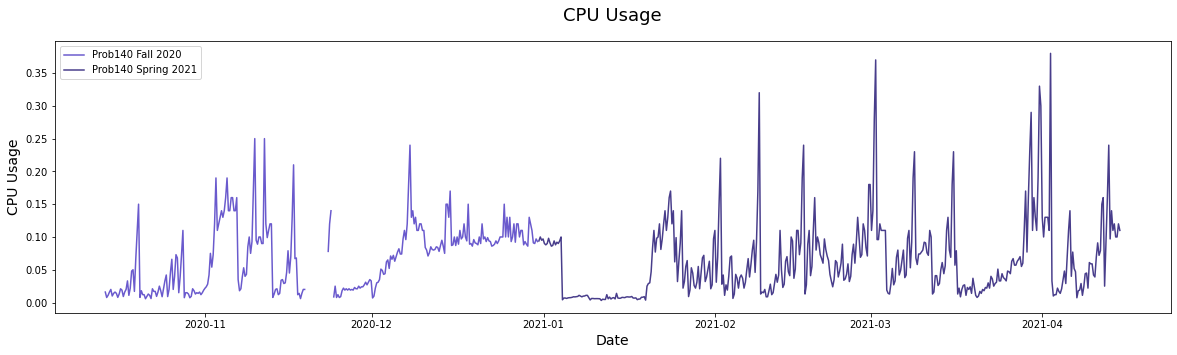

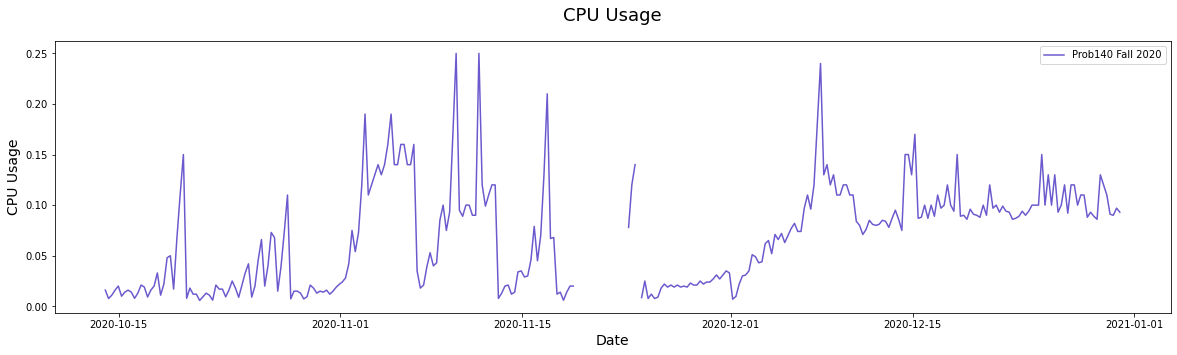

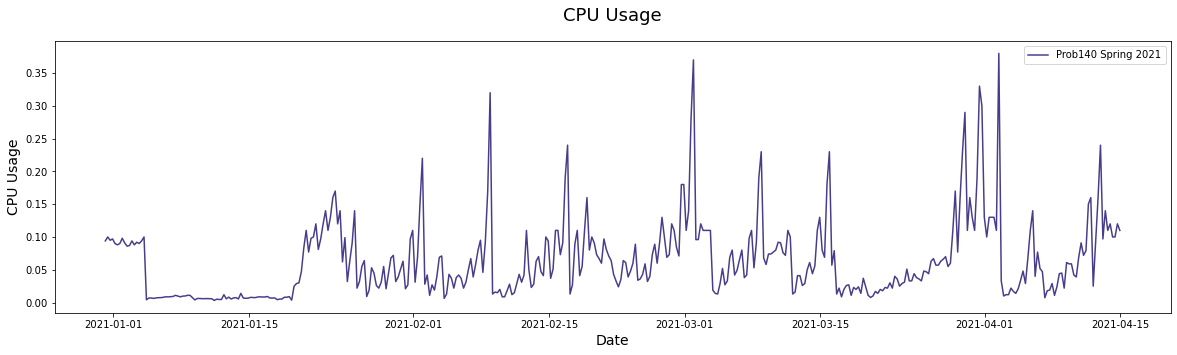

In [35]:
prob140_path = '../data/grafana/prob140hub/'
prob140_cpu = pd.read_csv(prob140_path + "prob140_cpu.csv")

prob140_fall_cpu, prob140_spring_cpu = split_fasp(prob140_cpu)

plot_cpu([prob140_fall_cpu, prob140_spring_cpu], ["Prob140 Fall 2020", "Prob140 Spring 2021"], [colors[8], colors[9]])
plot_cpu_single(prob140_fall_cpu, "Prob140 Fall 2020", colors[8])
plot_cpu_single(prob140_spring_cpu, "Prob140 Spring 2021", colors[9])

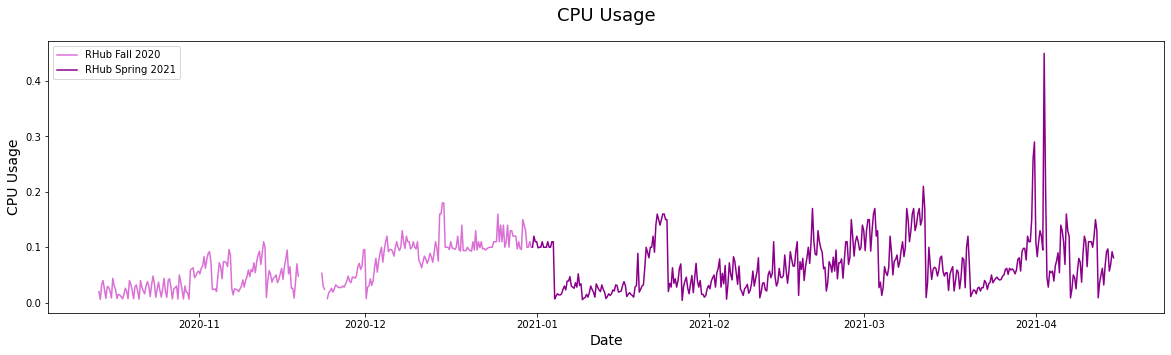

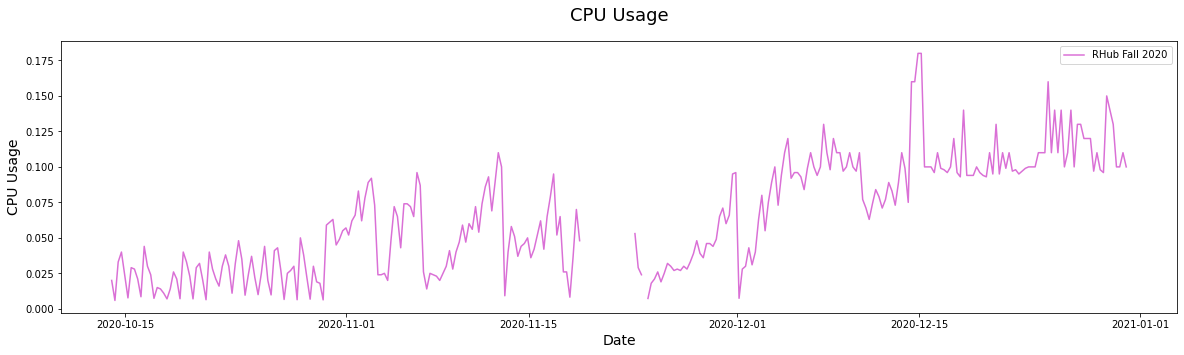

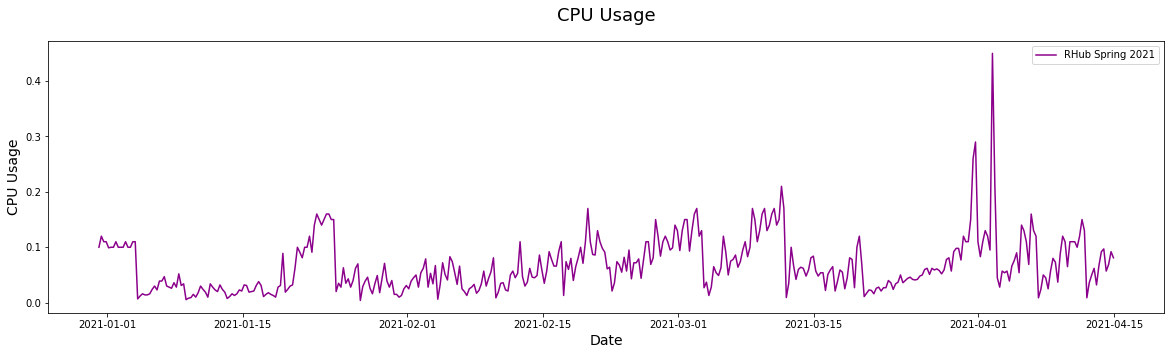

In [36]:
rhub_path = '../data/grafana/rhub/'
rhub_cpu = pd.read_csv(rhub_path + "rhub_cpu.csv")

rhub_fall_cpu, rhub_spring_cpu = split_fasp(rhub_cpu)

plot_cpu([rhub_fall_cpu, rhub_spring_cpu], ["RHub Fall 2020", "RHub Spring 2021"], [colors[10], colors[11]])
plot_cpu_single(rhub_fall_cpu, "RHub Fall 2020", colors[10])
plot_cpu_single(rhub_spring_cpu, "RHub Spring 2021", colors[11])

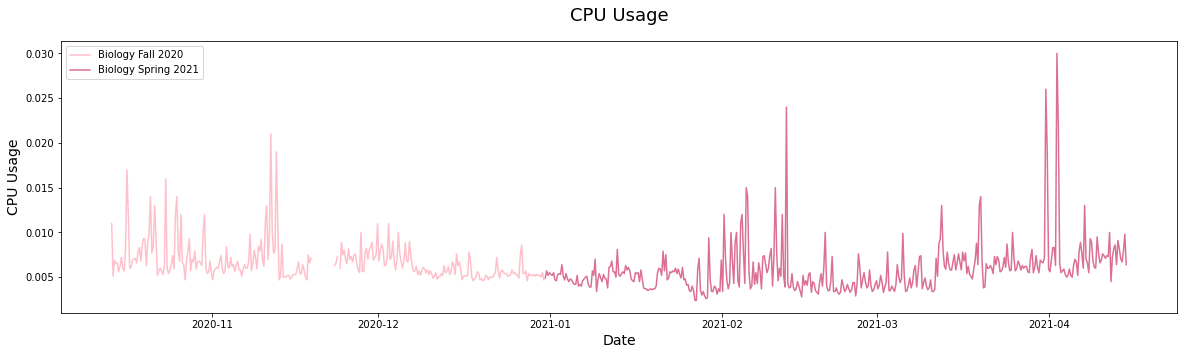

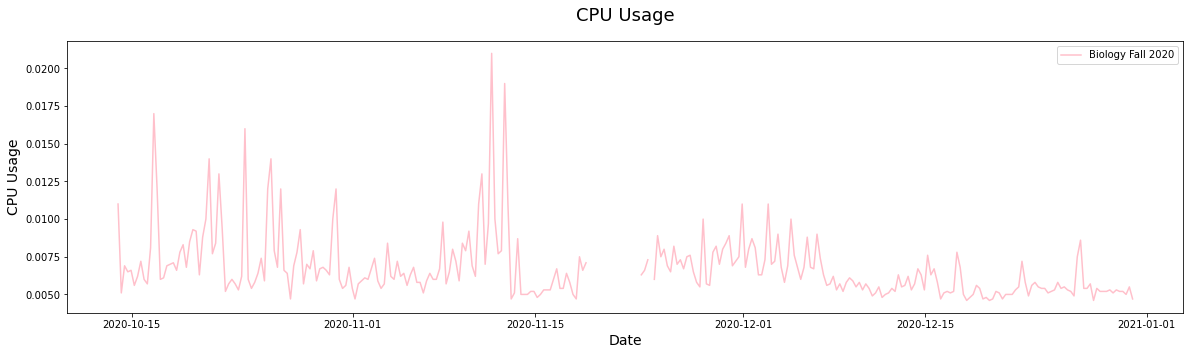

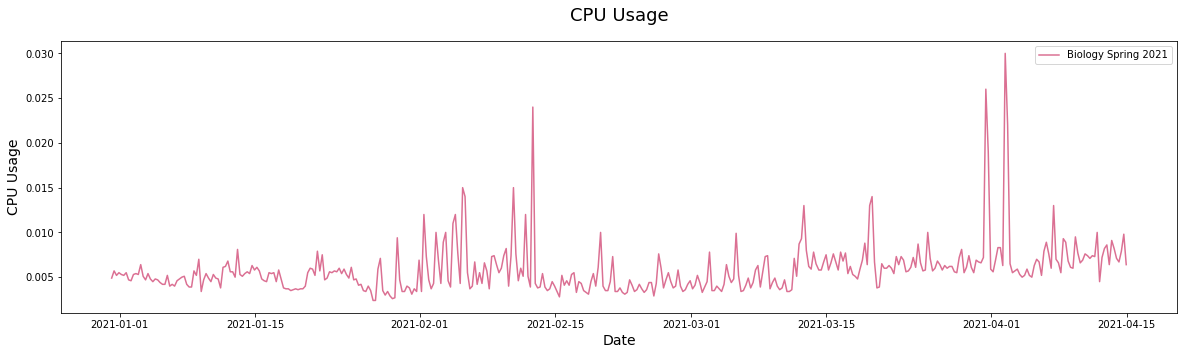

In [37]:
biology_path = '../data/grafana/biology/'
biology_cpu = pd.read_csv(biology_path + "biology_cpu.csv")

biology_fall_cpu, biology_spring_cpu = split_fasp(biology_cpu)

plot_cpu([biology_fall_cpu, biology_spring_cpu], ["Biology Fall 2020", "Biology Spring 2021"], [colors[12], colors[13]])
plot_cpu_single(biology_fall_cpu, "Biology Fall 2020", colors[12])
plot_cpu_single(biology_spring_cpu, "Biology Spring 2021", colors[13])

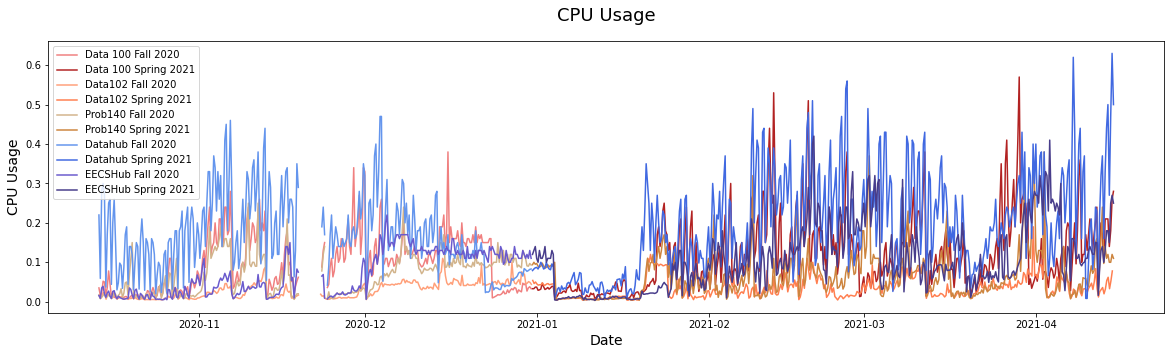

In [38]:
courses = data100_fall_cpu, data100_spring_cpu, data102_fall_cpu, data102_spring_cpu, prob140_fall_cpu, prob140_spring_cpu, datahub_fall_cpu, datahub_spring_cpu, eecs_fall_cpu, eecs_spring_cpu # split_fasp(rhub_cpu), split_fasp(biology_cpu)
names = ["Data 100 Fall 2020", "Data 100 Spring 2021", "Data102 Fall 2020", "Data102 Spring 2021", "Prob140 Fall 2020", "Prob140 Spring 2021", "Datahub Fall 2020", "Datahub Spring 2021", "EECSHub Fall 2020", "EECSHub Spring 2021", "RHub Fall 2020", "RHub Spring 2021", "Biology Fall 2020", "Biology Spring 2021"]

plot_cpu(courses, names)

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


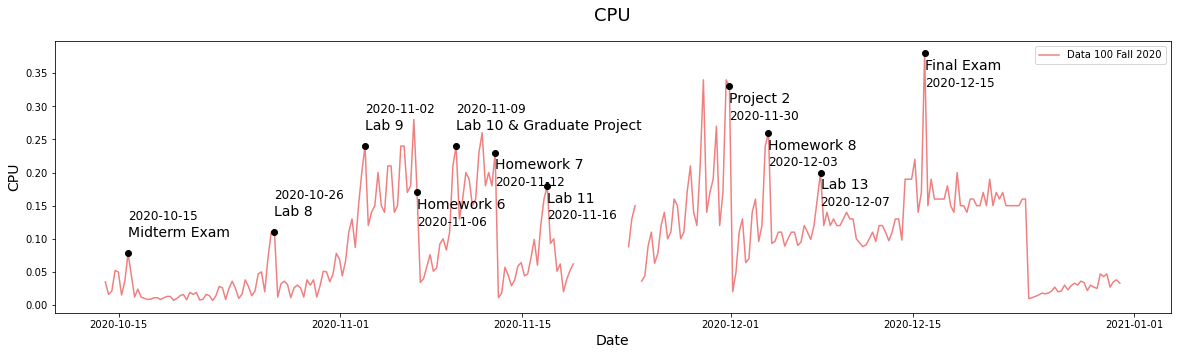

In [39]:
offset = 0.025
data100_annotations = pd.DataFrame({
    'x': data100_dates,
    'y': [return_value(data100_cpu, date) for date in data100_dates],
    'label': data100_fall_labels,
    'offset': [offset, offset, offset, -offset, offset, -offset, -offset, -offset, -offset, -offset, -offset, -offset]
})

plot_cpu_annotations(data100_fall_cpu, "Data 100 Fall 2020", data100_annotations, colors[0])

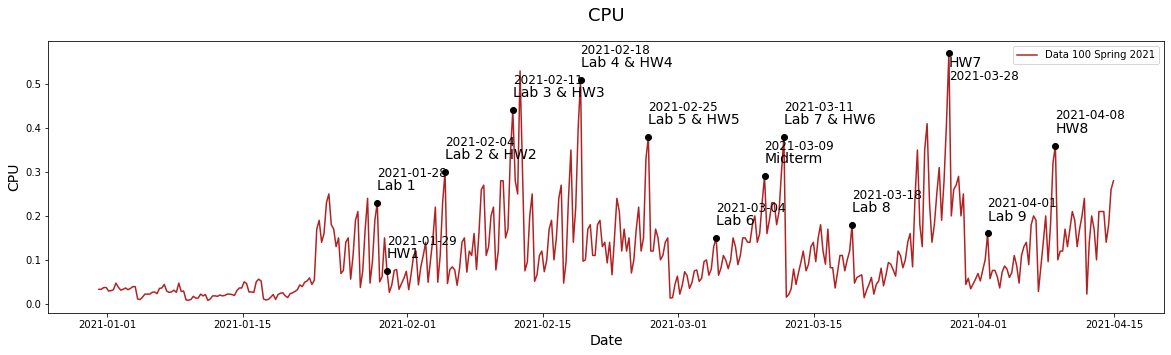

In [40]:
offset = 0.03

data100_spring_annotations = pd.DataFrame({
    'x': data100_spring_dates,
    'y': [return_value(data100_cpu, date) for date in data100_spring_dates],
    'label': data100_spring_labels,
    'offset': [offset, offset, offset, offset, offset, offset, offset, offset, offset, offset, -offset, offset, offset]
})

plot_cpu_annotations(data100_spring_cpu, "Data 100 Spring 2021", data100_spring_annotations, colors[1])

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


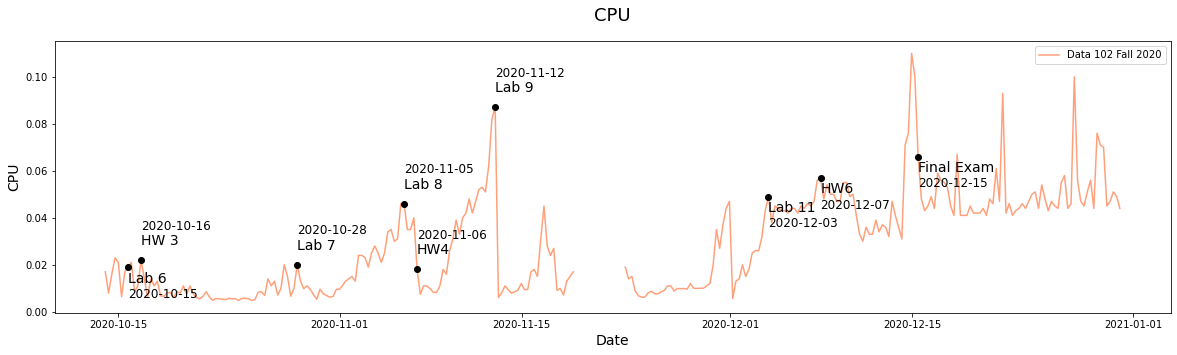

In [41]:
offset = 0.0065

data102_fall_annotations = pd.DataFrame({
    'x': data102_fall,
    'y': [return_value(data102_cpu, date) for date in data102_fall],
    'label': data102_fall_labels,
    'offset': [-offset, offset, offset, offset, offset, offset, -offset, -offset, -offset, -offset, -offset]
})
plot_cpu_annotations(data102_fall_cpu, "Data 102 Fall 2020", data102_fall_annotations, colors[2])

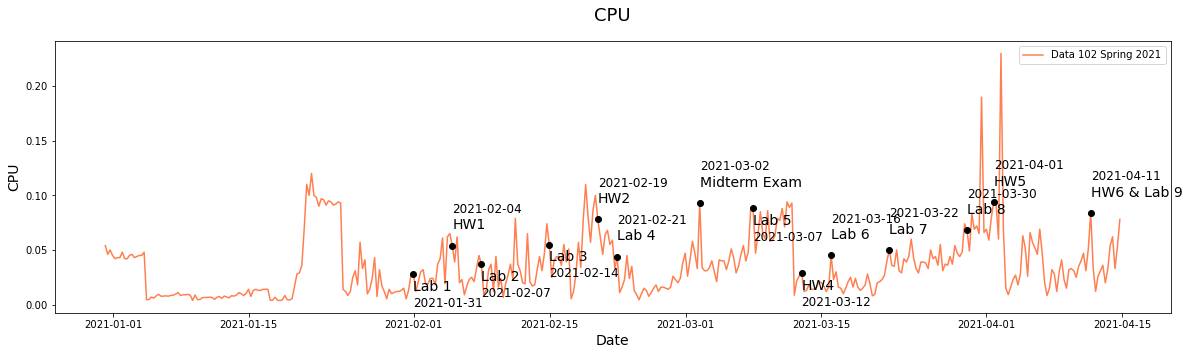

In [42]:
offset = 0.015
data102_spring_annotations = pd.DataFrame({
    'x': data102_spring,
    'y': [return_value(data102_cpu, date) for date in data102_spring],
    'label': data102_spring_labels,
    'offset': [-offset, offset, -offset, -offset, offset, offset, 
               offset, -offset, -offset, offset, offset, offset, 
               offset, offset]
})
plot_cpu_annotations(data102_spring_cpu, "Data 102 Spring 2021", data102_spring_annotations, colors[3])

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


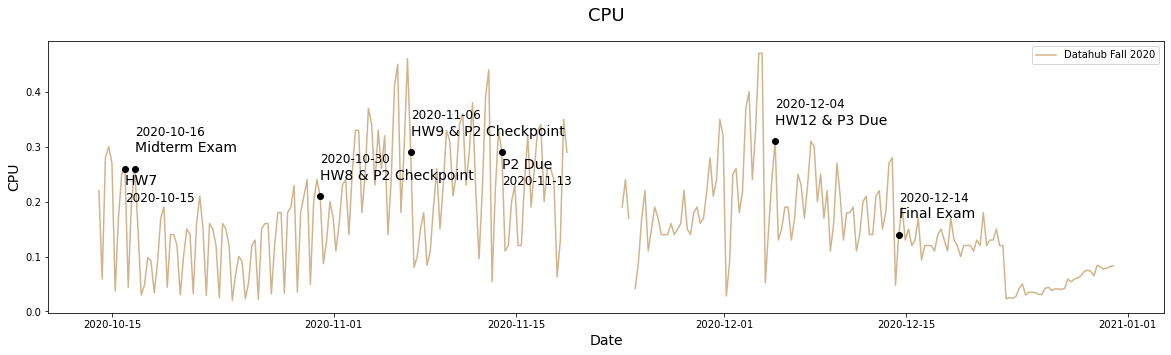

In [43]:
offset = 0.03
datahub_fall_annotations = pd.DataFrame({
    'x': datahub_fall,
    'y': [return_value(datahub_cpu, date) for date in datahub_fall],
    'label': datahub_fall_labels,
    'offset': [-offset, offset, offset, offset, -offset, offset, offset, offset]
})
plot_cpu_annotations(datahub_fall_cpu, "Datahub Fall 2020", datahub_fall_annotations, colors[4])

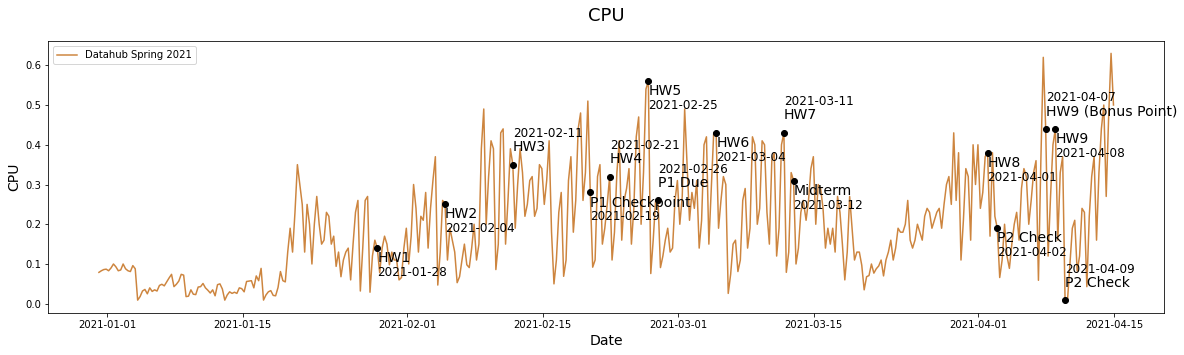

In [44]:
offset = 0.035
datahub_spring_annotations = pd.DataFrame({
    'x': datahub_spring,
    'y': [return_value(datahub_cpu, date) for date in datahub_spring],
    'label': datahub_spring_labels,
    'offset': [-offset, -offset, offset, -offset, offset, -offset, offset, -offset, offset, -offset, -offset, -offset, offset, -offset, offset]
})
plot_cpu_annotations(datahub_spring_cpu, "Datahub Spring 2021", datahub_spring_annotations, colors[5])

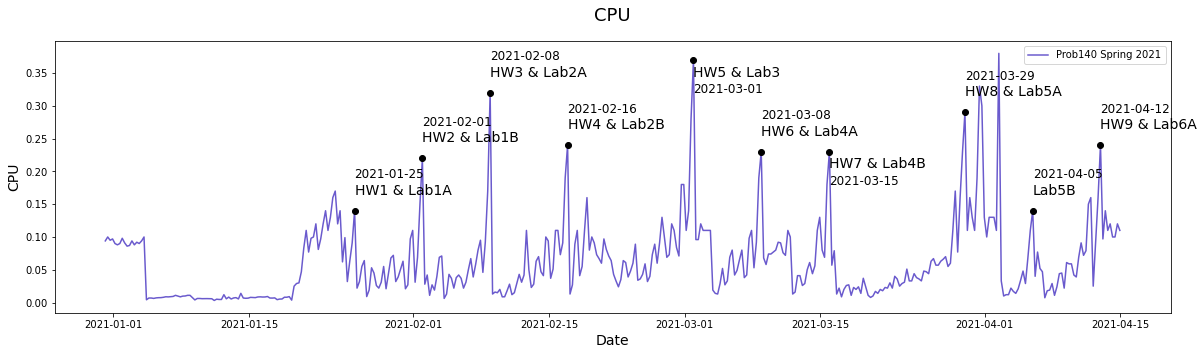

In [45]:
offset = 0.025
prob140_spring_annotations = pd.DataFrame({
    'x': prob140_spring,
    'y': [return_value(prob140_cpu, date) for date in prob140_spring],
    'label': prob140_spring_labels,
    'offset': [offset, offset, offset, offset, -offset, offset, -offset, offset, offset, offset]
})
plot_cpu_annotations(prob140_spring_cpu, "Prob140 Spring 2021", prob140_spring_annotations, colors[8])

# Memory Usage
This section visualizes the memory usage at each timestamp given in the Grafana data for each of the hubs. It separates the data between fall and spring semesters.

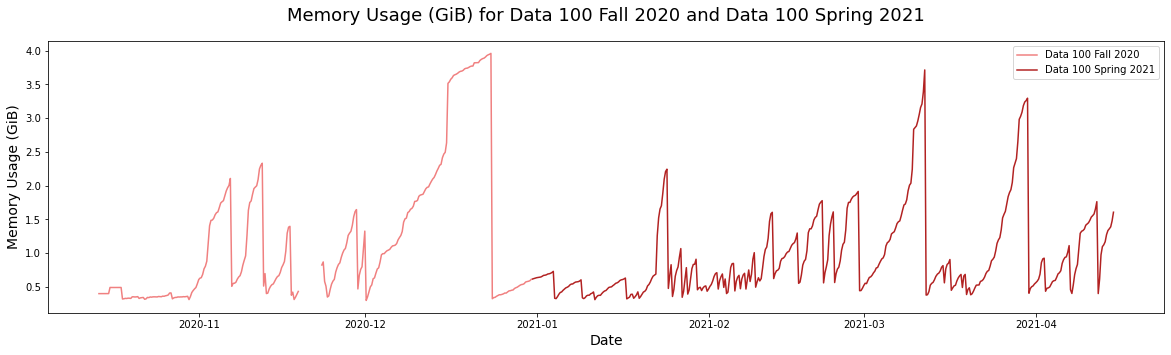

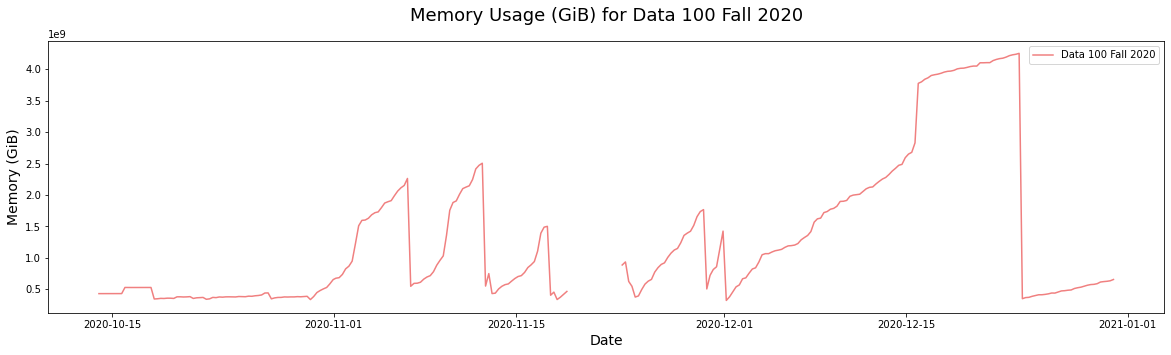

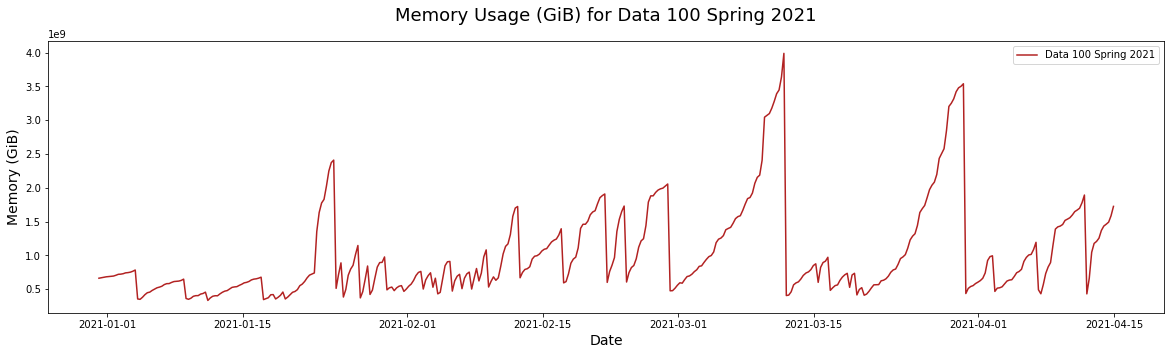

In [46]:
data100_path = '../data/grafana/data100hub/'
data100_memory = pd.read_csv(data100_path + 'data100_memory.csv')

data100_fall_memory, data100_spring_memory = split_fasp(data100_memory)
names = ["Data 100 Fall 2020", "Data 100 Spring 2021"]

plot_memory([data100_fall_memory, data100_spring_memory], ["Data 100 Fall 2020", "Data 100 Spring 2021"], [colors[0], colors[1]])
plot_memory_single(data100_fall_memory, "Data 100 Fall 2020", colors[0])
plot_memory_single(data100_spring_memory, "Data 100 Spring 2021", colors[1])

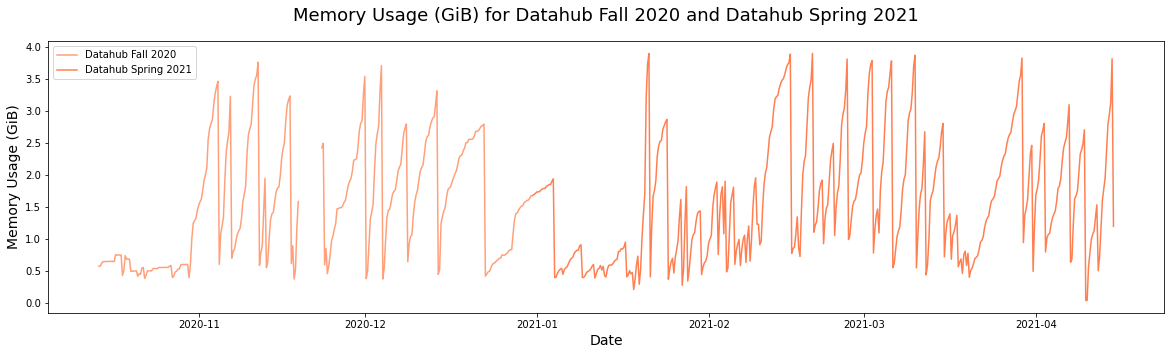

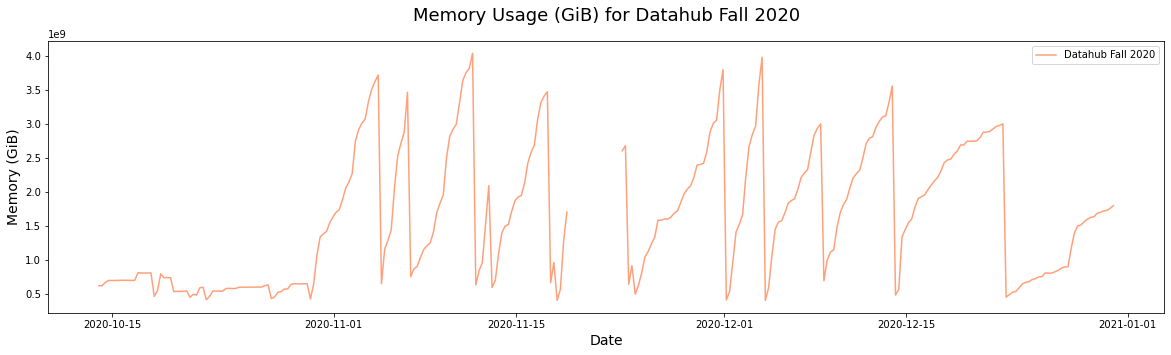

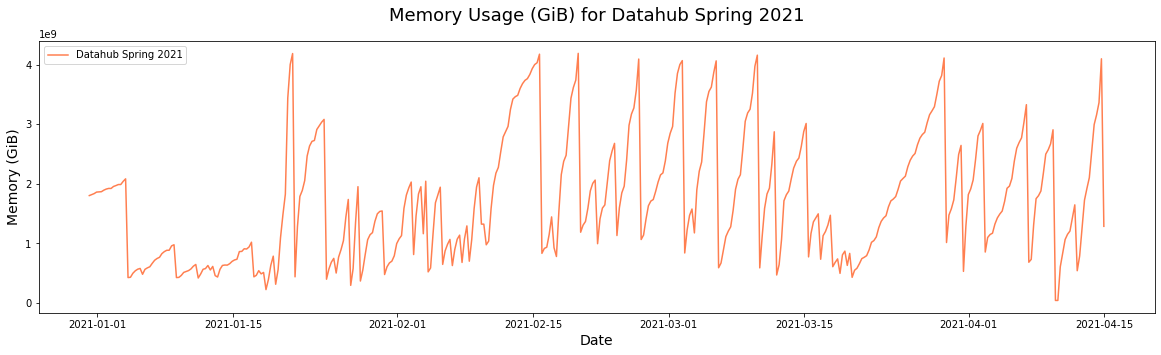

In [47]:
datahub_path = '../data/grafana/datahub/'
datahub_memory = pd.read_csv(datahub_path + 'datahub_memory.csv')

datahub_fall_memory, datahub_spring_memory = split_fasp(datahub_memory)

plot_memory([datahub_fall_memory, datahub_spring_memory], ["Datahub Fall 2020", "Datahub Spring 2021"], [colors[2], colors[3]])
plot_memory_single(datahub_fall_memory, "Datahub Fall 2020", colors[2])
plot_memory_single(datahub_spring_memory, "Datahub Spring 2021", colors[3])

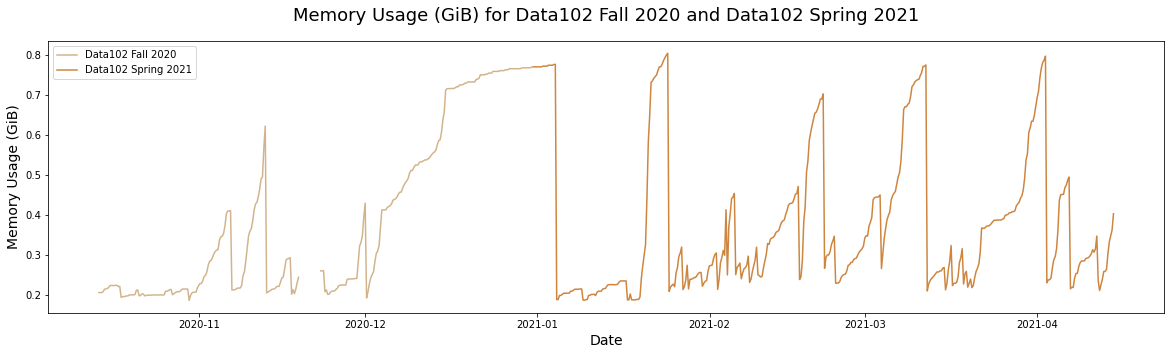

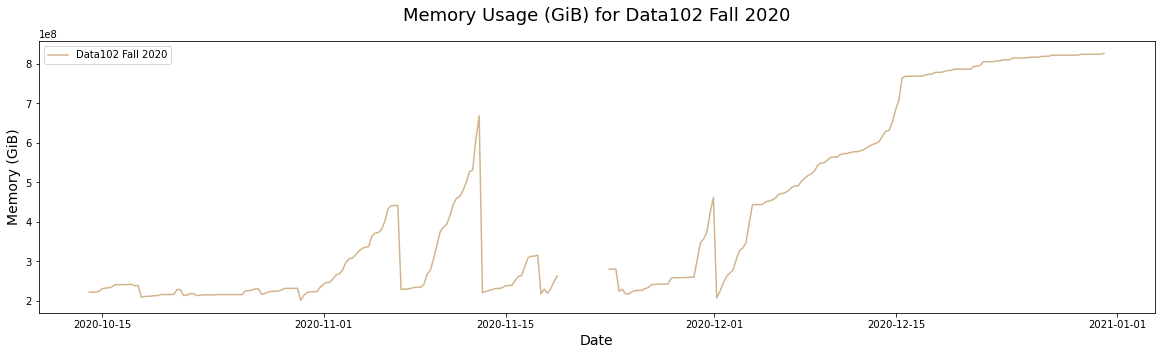

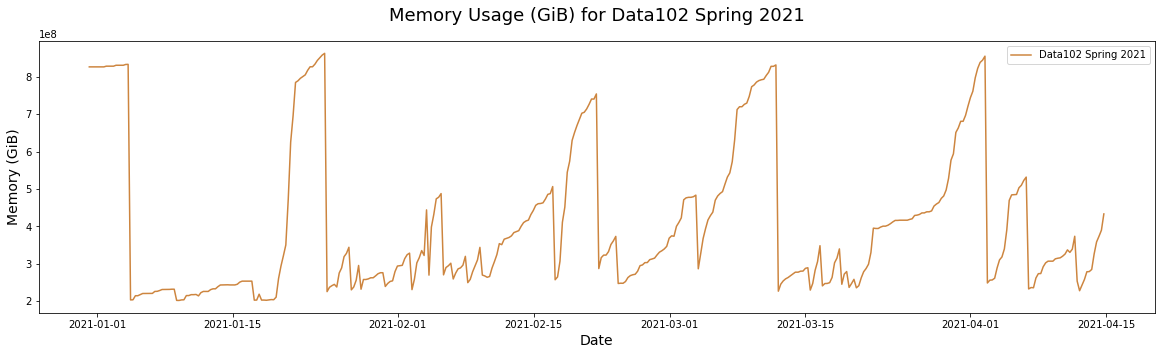

In [48]:
data102_path = '../data/grafana/data102hub/'
data102_memory = pd.read_csv(data102_path + "data102_memory.csv")

data102_fall_memory, data102_spring_memory = split_fasp(data102_memory)

plot_memory([data102_fall_memory, data102_spring_memory], ["Data102 Fall 2020", "Data102 Spring 2021"], [colors[4], colors[5]])
plot_memory_single(data102_fall_memory, "Data102 Fall 2020", colors[4])
plot_memory_single(data102_spring_memory, "Data102 Spring 2021", colors[5])

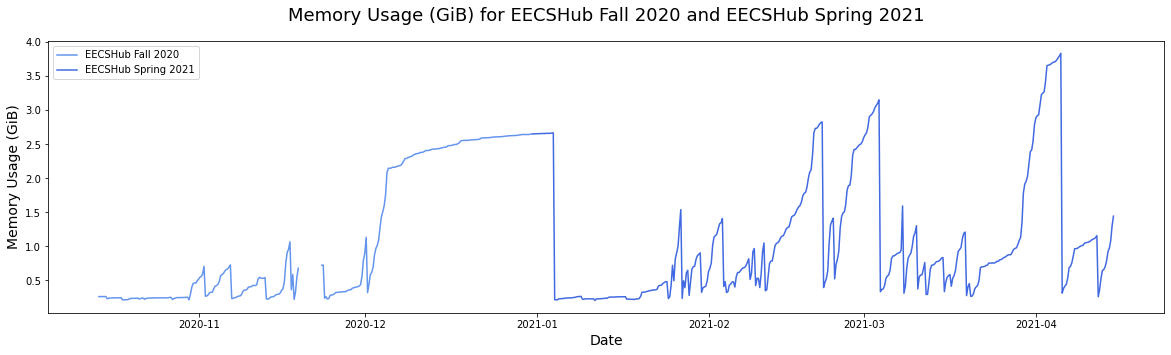

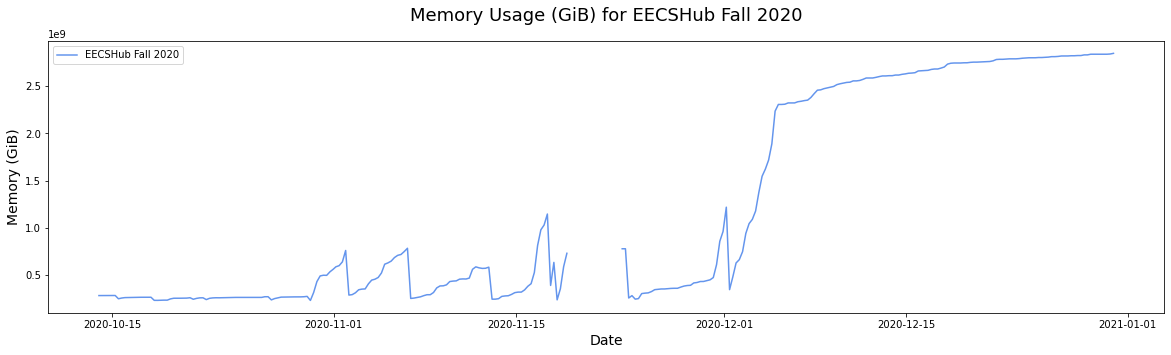

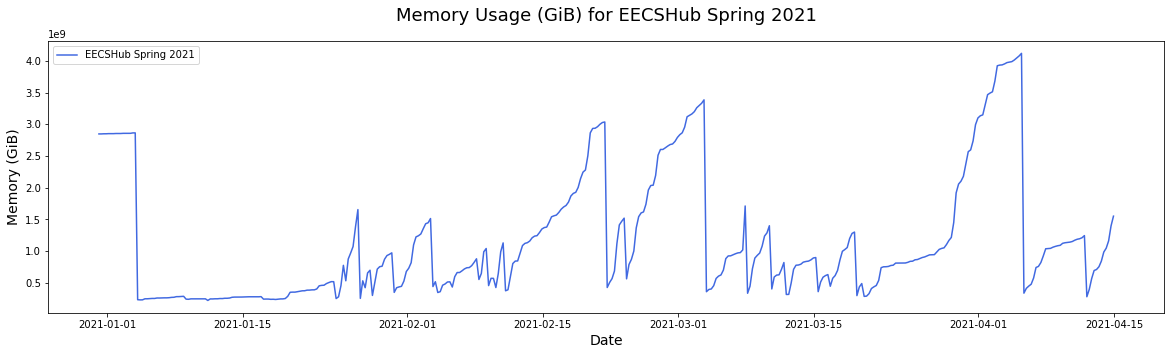

In [49]:
eecs_path = '../data/grafana/eecshub/'
eecs_memory = pd.read_csv(eecs_path + "eecs_memory.csv")

eecs_fall_memory, eecs_spring_memory = split_fasp(eecs_memory)

plot_memory([eecs_fall_memory, eecs_spring_memory], ["EECSHub Fall 2020", "EECSHub Spring 2021"], [colors[6], colors[7]])
plot_memory_single(eecs_fall_memory, "EECSHub Fall 2020", colors[6])
plot_memory_single(eecs_spring_memory, "EECSHub Spring 2021", colors[7])

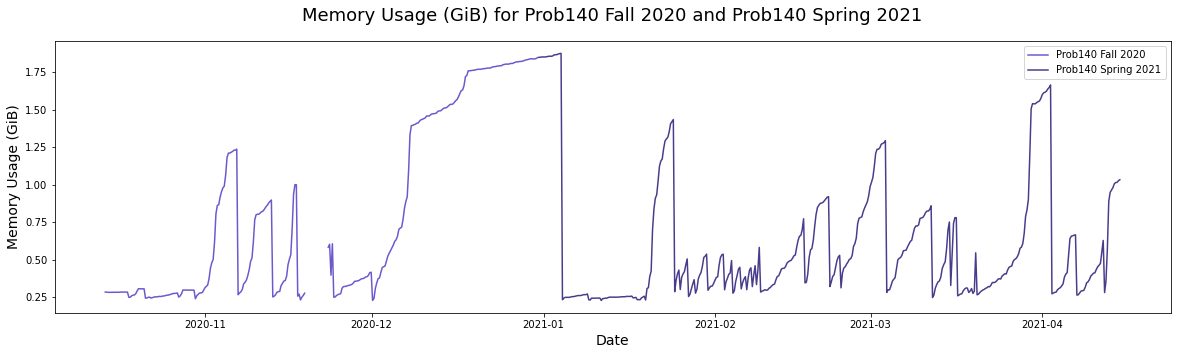

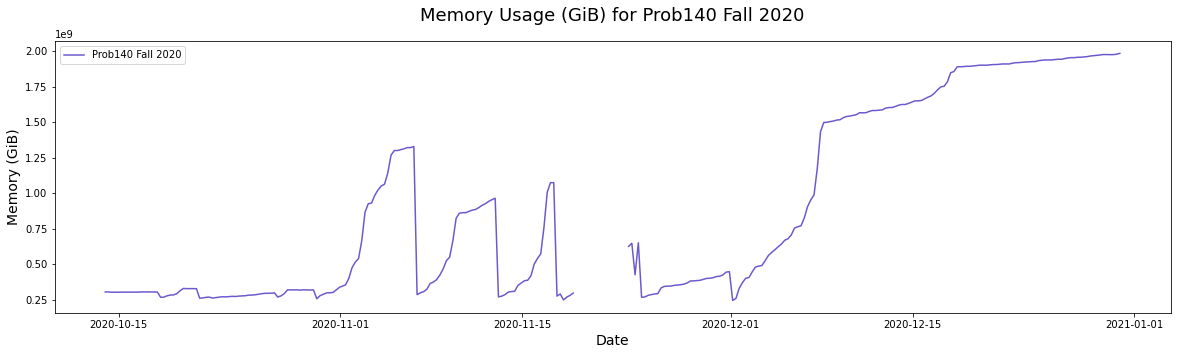

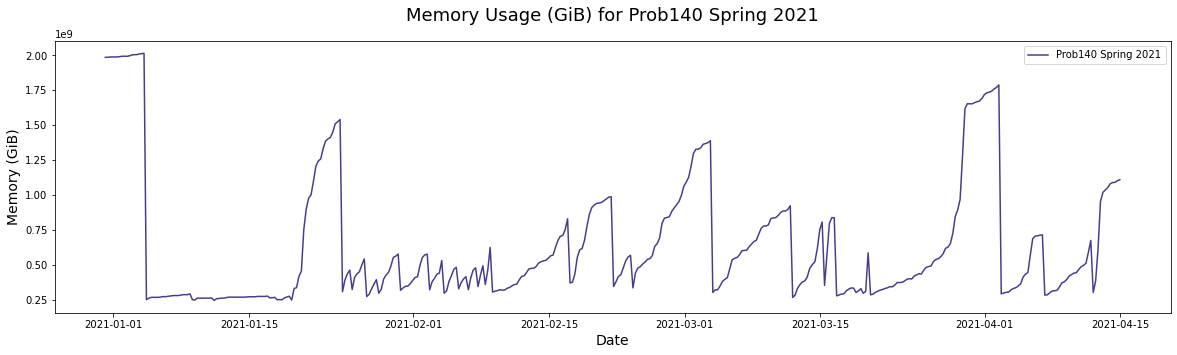

In [50]:
prob140_path = '../data/grafana/prob140hub/'
prob140_memory = pd.read_csv(prob140_path + "prob140_memory.csv")

prob140_fall_memory, prob140_spring_memory = split_fasp(prob140_memory)

plot_memory([prob140_fall_memory, prob140_spring_memory], ["Prob140 Fall 2020", "Prob140 Spring 2021"], [colors[8], colors[9]])
plot_memory_single(prob140_fall_memory, "Prob140 Fall 2020", colors[8])
plot_memory_single(prob140_spring_memory, "Prob140 Spring 2021", colors[9])

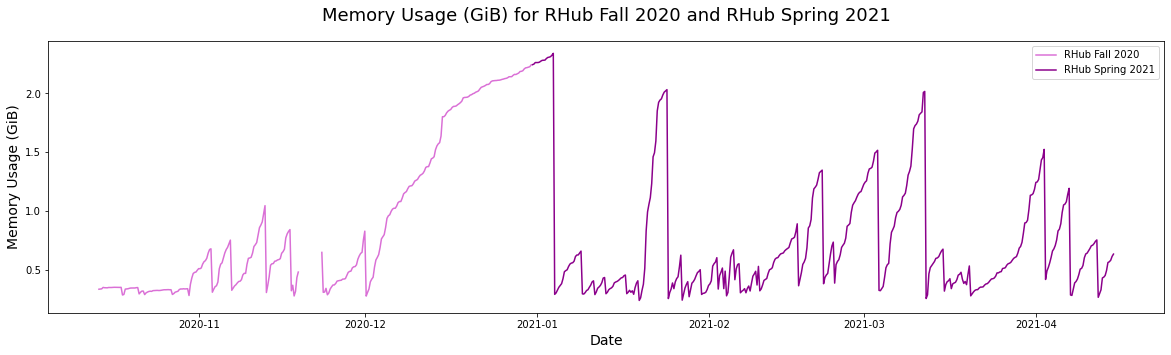

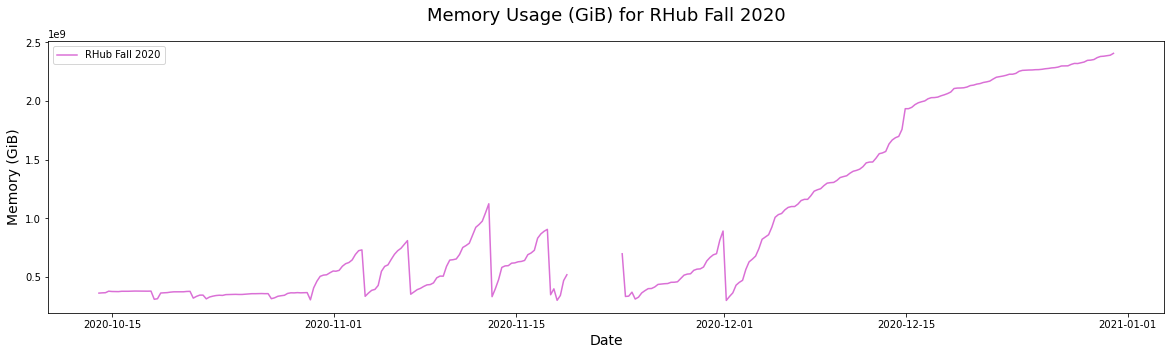

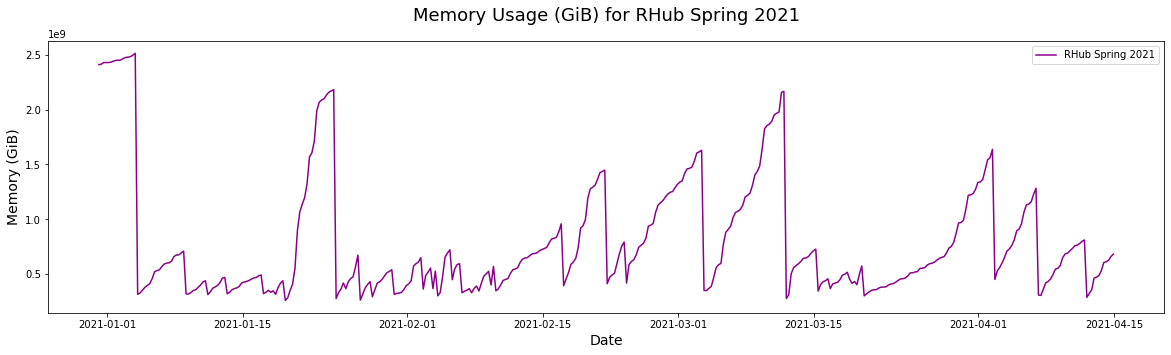

In [51]:
rhub_path = '../data/grafana/rhub/'
rhub_memory = pd.read_csv(rhub_path + "rhub_memory.csv")

rhub_fall_memory, rhub_spring_memory = split_fasp(rhub_memory)

plot_memory([rhub_fall_memory, rhub_spring_memory], ["RHub Fall 2020", "RHub Spring 2021"], [colors[10], colors[11]])
plot_memory_single(rhub_fall_memory, "RHub Fall 2020", colors[10])
plot_memory_single(rhub_spring_memory, "RHub Spring 2021", colors[11])

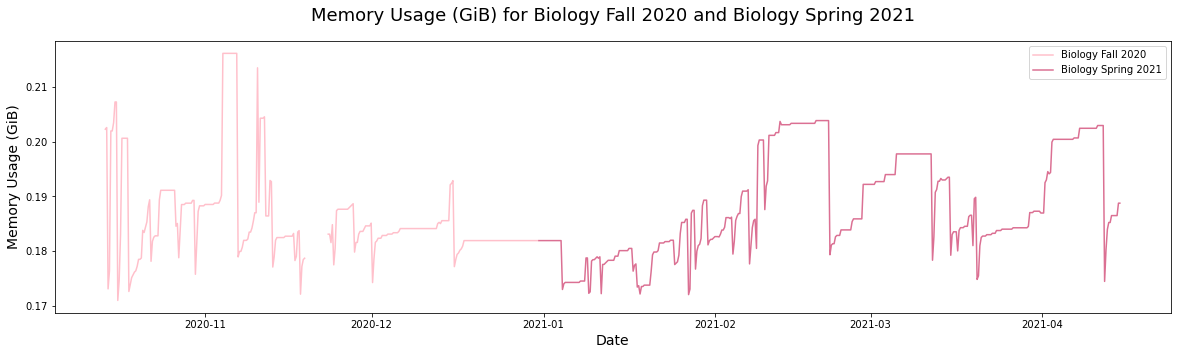

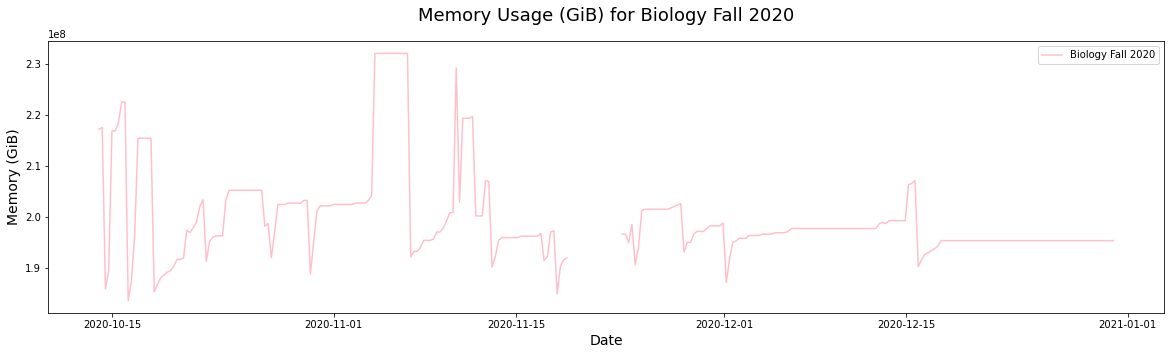

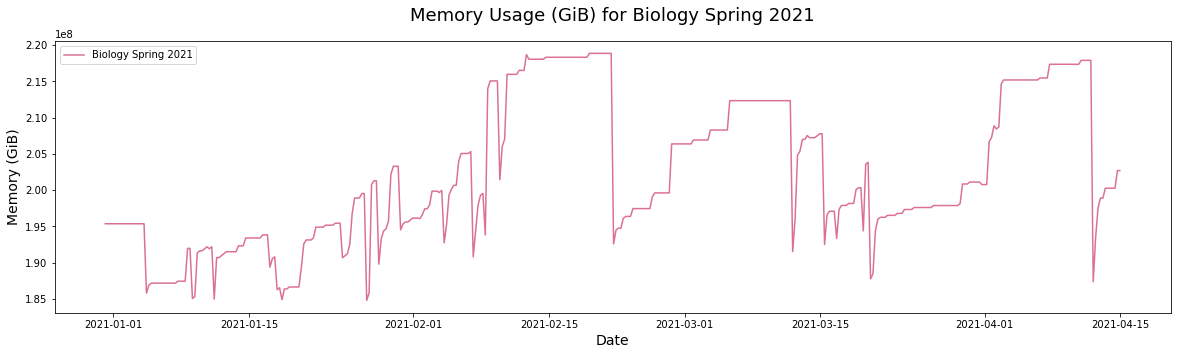

In [52]:
biology_path = '../data/grafana/biology/'
biology_memory = pd.read_csv(biology_path + "biology_memory.csv")

biology_fall_memory, biology_spring_memory = split_fasp(biology_memory)

plot_memory([biology_fall_memory, biology_spring_memory], ["Biology Fall 2020", "Biology Spring 2021"], [colors[12], colors[13]])
plot_memory_single(biology_fall_memory, "Biology Fall 2020", colors[12])
plot_memory_single(biology_spring_memory, "Biology Spring 2021", colors[13])

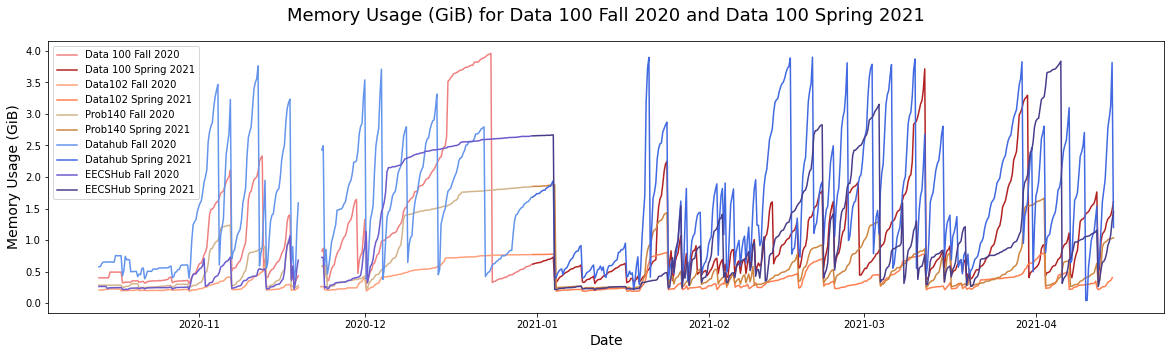

In [53]:
courses = data100_fall_memory, data100_spring_memory, data102_fall_memory, data102_spring_memory, prob140_fall_memory, prob140_spring_memory, datahub_fall_memory, datahub_spring_memory, eecs_fall_memory, eecs_spring_memory # split_fasp(rhub_cpu), split_fasp(biology_cpu)
names = ["Data 100 Fall 2020", "Data 100 Spring 2021", "Data102 Fall 2020", "Data102 Spring 2021", "Prob140 Fall 2020", "Prob140 Spring 2021", "Datahub Fall 2020", "Datahub Spring 2021", "EECSHub Fall 2020", "EECSHub Spring 2021", "RHub Fall 2020", "RHub Spring 2021", "Biology Fall 2020", "Biology Spring 2021"]

plot_memory(courses, names)

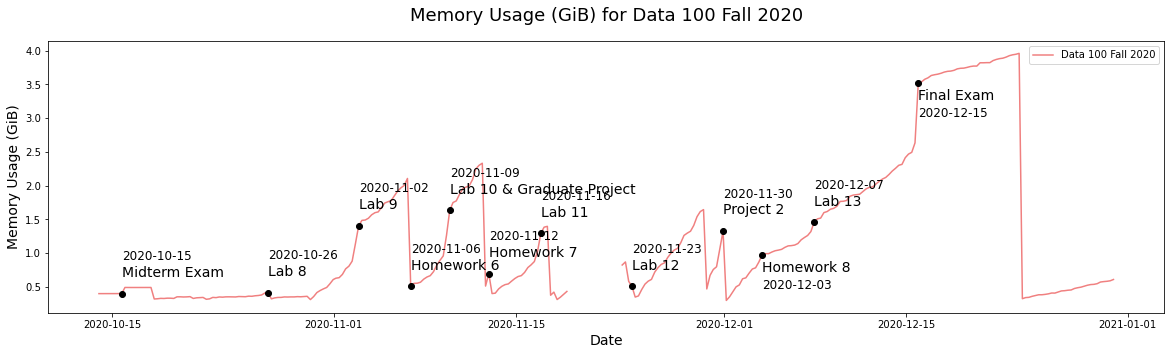

In [54]:
offset = 0.25
data100_fall_annotations = pd.DataFrame({
    'x': data100_dates,
    'y': [return_value(data100_memory, date) * 1.0 / (2 ** 30) for date in data100_dates],
    'label': data100_fall_labels,
    'offset': [offset, offset, offset, offset, offset, offset, offset, offset, offset, -offset, offset, -offset]
})

plot_memory_annotations(data100_fall_memory, "Data 100 Fall 2020", data100_fall_annotations, colors[0])

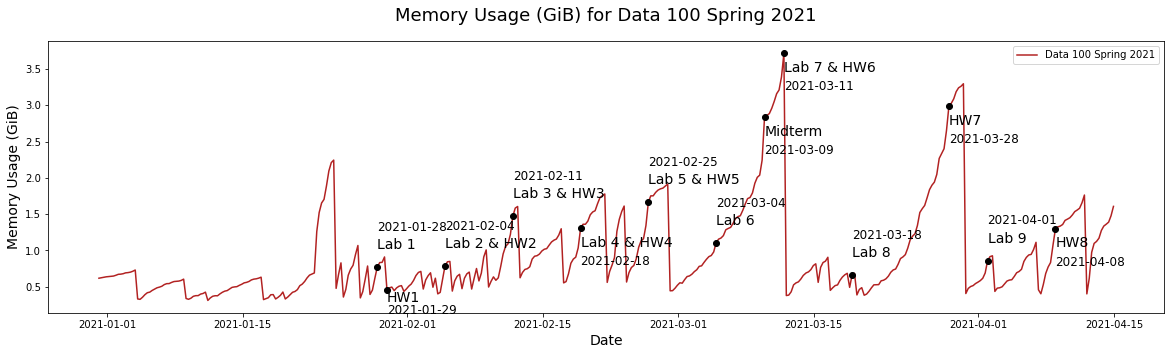

In [55]:
offset = 0.25
data100_spring_annotations = pd.DataFrame({
    'x': data100_spring_dates,
    'y': [return_value(data100_memory, date) * 1.0 / (2 ** 30) for date in data100_spring_dates],
    'label': data100_spring_labels,
    'offset': [offset, -offset/1.5, offset, offset, -offset, offset, offset, -offset, -offset, offset, -offset, offset, -offset]
})

plot_memory_annotations(data100_spring_memory, "Data 100 Spring 2021", data100_spring_annotations, colors[1])

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


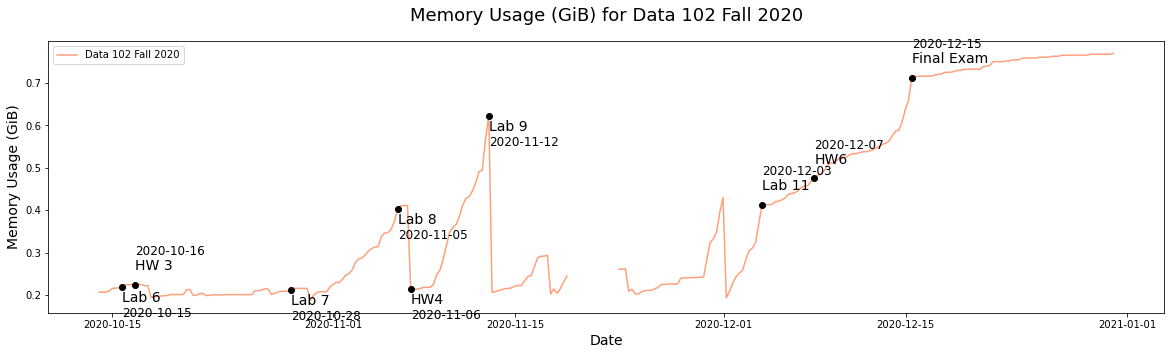

In [56]:
offset = 0.035
data102_fall_annotations = pd.DataFrame({
    'x': data102_fall,
    'y': [return_value(data102_memory, date) * 1.0 / (2 ** 30) for date in data102_fall],
    'label': data102_fall_labels,
    'offset': [-offset, offset, -offset, -offset, -offset, -offset, -offset, offset,
              offset,offset, offset]
})

plot_memory_annotations(data102_fall_memory, "Data 102 Fall 2020", data102_fall_annotations, colors[2])

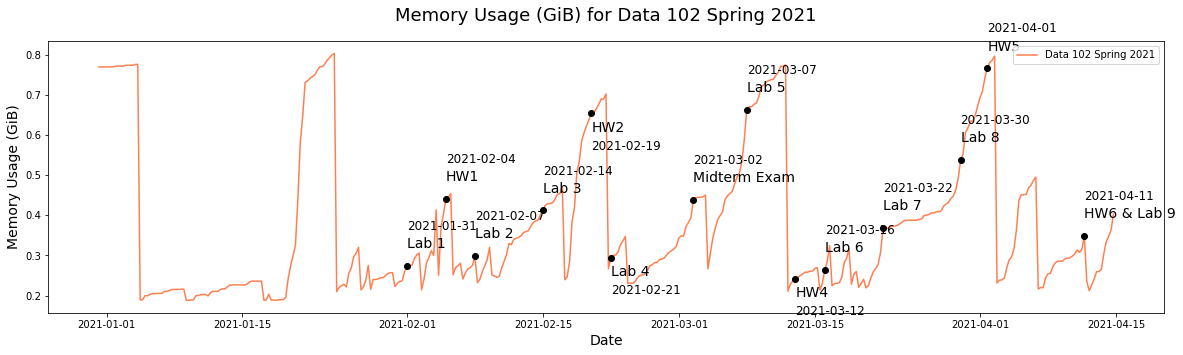

In [57]:
offset = 0.045
data102_spring_annotations = pd.DataFrame({
    'x': data102_spring,
    'y': [return_value(data102_memory, date) * 1.0 / (2 ** 30) for date in data102_spring],
    'label': data102_spring_labels,
    'offset': [offset, offset, offset, offset, -offset, -offset, offset, offset, 
               -offset, offset, offset, offset, offset, offset]
})

plot_memory_annotations(data102_spring_memory, "Data 102 Spring 2021", data102_spring_annotations, colors[3])

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


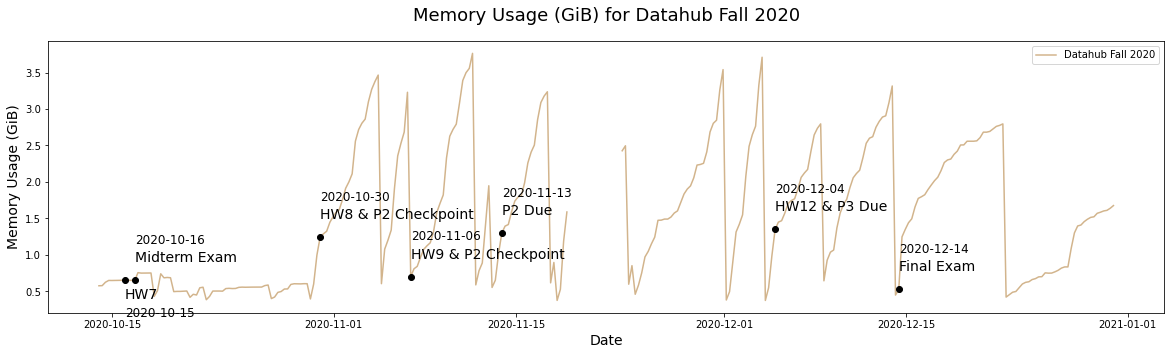

In [58]:
offset = 0.25
datahub_fall_annotations = pd.DataFrame({
    'x': datahub_fall,
    'y': [return_value(datahub_memory, date) * 1.0 / (2 ** 30) for date in datahub_fall],
    'label': datahub_fall_labels,
    'offset': [-offset, offset, offset, offset, offset, offset, offset, offset]
})
plot_memory_annotations(datahub_fall_memory, "Datahub Fall 2020", datahub_fall_annotations, colors[4])

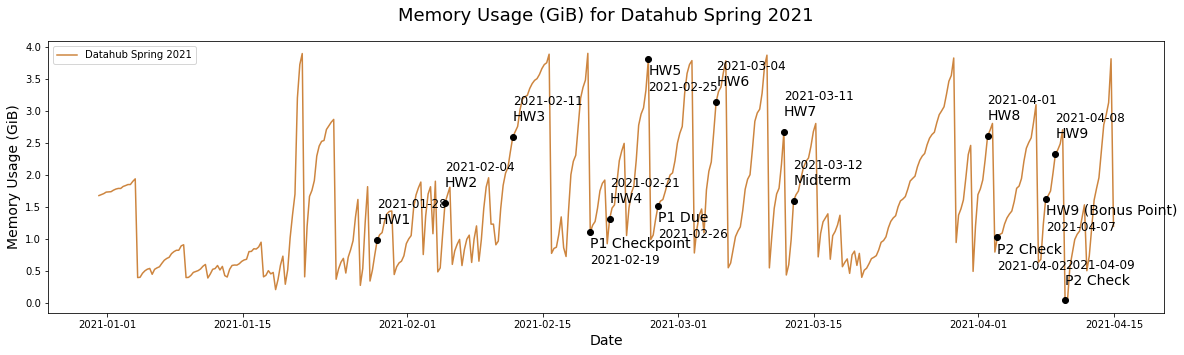

In [59]:
offset = 0.25
datahub_spring_annotations = pd.DataFrame({
    'x': datahub_spring,
    'y': [return_value(datahub_memory, date) * 1.0 / (2 ** 30) for date in datahub_spring],
    'label': datahub_spring_labels,
    'offset': [offset, offset, offset, -offset, offset, -offset, -offset, offset, offset, offset, offset, -offset, -offset, offset, offset]
})
plot_memory_annotations(datahub_spring_memory, "Datahub Spring 2021", datahub_spring_annotations, colors[5])

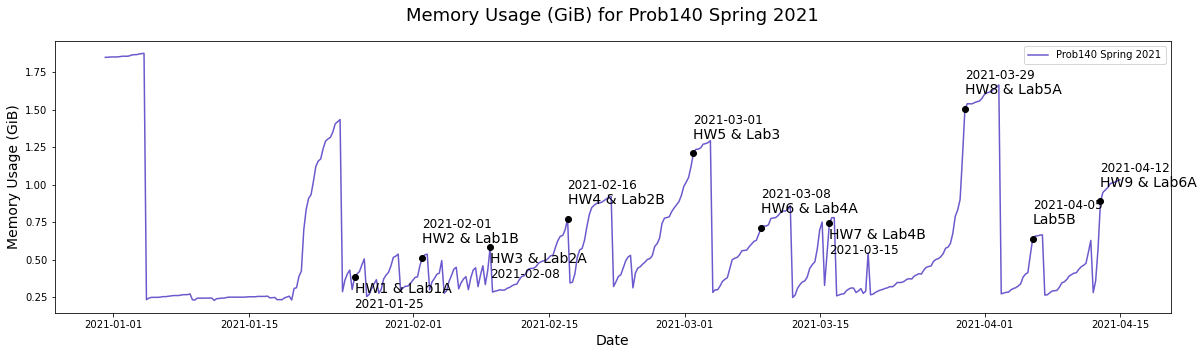

In [60]:
offset = 0.1
prob140_spring_annotations = pd.DataFrame({
    'x': prob140_spring,
    'y': [return_value(prob140_memory, date) * 1.0 / (2 ** 30) for date in prob140_spring],
    'label': prob140_spring_labels,
    'offset': [-offset, offset, -offset, offset, offset, offset, -offset, offset, offset, offset]
})
plot_memory_annotations(prob140_spring_memory, "Prob140 Spring 2021", prob140_spring_annotations, colors[8])